<a href="https://colab.research.google.com/github/costaer/PIQueimadas/blob/main/PIQueimadas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Projeto integrador IV Univesp Segundo semestre 2025

# Desenvolvimento de API para Previsão de Risco de Queimadas

## Objetivo do Projeto

O objetivo deste projeto é desenvolver uma API para previsão de risco de queimadas na região de São José do Rio Preto, SP. Para isso, selecionamos áreas com características climáticas e agrícolas compatíveis à região de interesse, utilizando dados meteorológicos de estações automáticas do INMET.

---

## Justificativa da Escolha das Áreas

Optou-se por estações localizadas em regiões agrícolas do interior paulista, como Votuporanga, José Bonifácio, Jales, Ariranha, Barretos, Bebedouro e Presidente Prudente. Essas áreas apresentam condições climáticas e de uso do solo semelhantes às de São José do Rio Preto, garantindo a representatividade dos dados para o treinamento do modelo preditivo.

---

## Dados Meteorológicos Selecionados

Os dados meteorológicos foram coletados a partir do [Banco de Dados Meteorológicos do INMET (BDMEP)](https://bdmep.inmet.gov.br/), abrangendo o período de 01/01/2015 a 31/12/2024. As variáveis selecionadas incluem:

- Precipitação Total Horária
- Pressão Atmosférica ao Nível da Estação (Horária)
- Pressão Atmosférica Reduzida ao Nível do Mar (Automática)
- Pressão Atmosférica Máxima na Hora Anterior (Automática)
- Pressão Atmosférica Mínima na Hora Anterior (Automática)
- Radiação Global
- Temperatura da CPU da Estação
- Temperatura do Ar - Bulbo Seco (Horária)
- Temperatura do Ponto de Orvalho
- Temperatura Máxima na Hora Anterior (Automática)
- Temperatura Mínima na Hora Anterior (Automática)
- Temperatura do Orvalho Máxima na Hora Anterior (Automática)
- Temperatura do Orvalho Mínima na Hora Anterior (Automática)
- Tensão da Bateria da Estação
- Umidade Relativa Máxima na Hora Anterior (Automática)
- Umidade Relativa Mínima na Hora Anterior (Automática)
- Umidade Relativa do Ar (Horária)
- Vento - Direção Horária
- Vento - Rajada Máxima
- Vento - Velocidade Horária

---

## Estações Selecionadas

As estações automáticas do INMET selecionadas para coleta dos dados são:

- Ariranha (A736)
- Barretos (A748)
- Bebedouro (A764)
- Jales (A733)
- José Bonifácio (A735)
- Lins (A727)
- Presidente Prudente (A707)
- Votuporanga (A729)

Essas estações foram escolhidas por estarem localizadas em regiões com características climáticas e agrícolas semelhantes às de São José do Rio Preto, garantindo a representatividade dos dados para o modelo preditivo.

A fim de garantir uma abrangência maior e conseguir utilizar a região que estamos estudando, foi requerido junto com o CIIAGRO dados das estações:

- Mirassol (V0419)
- Monte Aprasível (V0428)
- Nhandeara (V0433)
- Nova Granada (V0434)



---

## Acesso aos Dados

Os dados meteorológicos podem ser acessados através do [Banco de Dados Meteorológicos do INMET (BDMEP)](https://bdmep.inmet.gov.br/), onde é possível selecionar as estações, variáveis e período desejados para download.

os dados do CIIAGRO foi necessário pedir acesso, cedido no Banco de dados da rede meteorológica do Centro Integrado de Informações Agrometeorológicas - CIIAGRO.

---

## Dados de Queimadas

Para correlacionar os dados meteorológicos com eventos de queimadas, utilizamos os dados do [Sistema de Monitoramento de Queimadas do INPE](https://queimadas.dgi.inpe.br/queimadas/portal-static/estatisticas.html), que fornecem informações sobre focos de queimada, incluindo data, hora, localização e intensidade.

---

## Desenvolvimento do Modelo Preditivo

Com os dados meteorológicos e de queimadas correlacionados, será possível treinar um modelo de aprendizado de máquina para prever o risco de incêndios na região de São José do Rio Preto. Variáveis como umidade do ar, temperatura, precipitação e radiação solar serão fundamentais para a acurácia do modelo.

# Inicio da importação dos dados e criação do banco que será utilizado

**Unificação dos arquivos do INMET e tratamento da coluna Data medicao e Hora medicao para uma coluna só e adicionada coluna cidade para depois unificar com dados do INPE**

In [1]:
# Imports
import pandas as pd
import glob
import os

# Caminho da base no Google Drive para os dados do INMET
caminho_dados_inmet = '/content/drive/MyDrive/Estudos/Univesp - dados/PI QUEIMADAS/INMET'

# Lista de arquivos CSV
arquivos_csv_inmet = glob.glob(os.path.join(caminho_dados_inmet, "*.csv"))

# Lista para armazenar as bases
lista_bases_inmet = []

# Função para padronizar nomes de cidades
def padronizar_nome_cidade(nome):
    nome = nome.upper().strip()
    # Remover acentos e caracteres especiais
    nome = nome.replace('É', 'E').replace('Á', 'A').replace('Í', 'I')
    nome = nome.replace('Ó', 'O').replace('Ú', 'U').replace('Â', 'A')
    nome = nome.replace('Ã', 'A').replace('Õ', 'O').replace('Ç', 'C')
    # Padronizar nomes específicos
    nome = nome.replace('JOSÉ BONIFÁCIO', 'JOSE BONIFACIO')
    return nome

# Mapeamento de colunas do INMET para nomes padronizados
mapeamento_colunas_inmet = {
    'PRECIPITACAO TOTAL, HORARIO(mm)': 'precipitacao',
    'PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA(mB)': 'pressaoatmosferica',
    'RADIACAO GLOBAL(Kj/mÂ²)': 'radiacaosolar',
    'TEMPERATURA DO AR - BULBO SECO, HORARIA(Â°C)': 'temperatura',
    'TEMPERATURA DO PONTO DE ORVALHO(Â°C)': 'temperaturapontodeorvalho',
    'UMIDADE RELATIVA DO AR, HORARIA(%)': 'umidaderelativadoar',
    'VENTO, VELOCIDADE HORARIA(m/s)': 'velocidadedovento'
}

for arquivo in arquivos_csv_inmet:
    with open(arquivo, 'r', encoding='latin1') as f:
        primeira_linha = f.readline().strip()

    if primeira_linha.lower().startswith('nome: '):
        cidade = primeira_linha.split(':', 1)[1].strip()
    else:
        cidade = 'desconhecido'

    # Ler o restante do arquivo, pulando as primeiras 10 linhas (cabeçalho começa na linha 11)
    # Usar nrows=0 para ler apenas o cabeçalho inicialmente para verificar as colunas
    df_temp = pd.read_csv(arquivo, skiprows=10, encoding='latin1', sep=';', nrows=0)
    colunas_originais = df_temp.columns.tolist()

    # Ler o arquivo completo agora
    df = pd.read_csv(arquivo, skiprows=10, encoding='latin1', sep=';')

    # Processar coluna 'Hora Medicao' para formato 'HH:MM:SS'
    if 'Hora Medicao' in df.columns:
        df['Hora Medicao'] = df['Hora Medicao'].astype(str).str.zfill(4)
        df['Hora Medicao'] = df['Hora Medicao'].apply(lambda x: f'{x[:2]}:{x[2:]}:00')

        # Combinar 'Data Medicao' e 'Hora Medicao' em uma coluna datetime
        df['datahoramedicao'] = pd.to_datetime(df['Data Medicao'] + ' ' + df['Hora Medicao'], errors='coerce')

        # Remover colunas originais de data e hora
        df = df.drop(columns=['Data Medicao', 'Hora Medicao'])
    else:
        # Se 'Hora Medicao' não existir, apenas renomear 'Data Medicao' se existir
        if 'Data Medicao' in df.columns:
             df.rename(columns={'Data Medicao': 'datahoramedicao'}, inplace=True)
             df['datahoramedicao'] = pd.to_datetime(df['datahoramedicao'], errors='coerce')
        else:
            print(f"Aviso: Colunas de Data e Hora não encontradas no arquivo {os.path.basename(arquivo)}")
            continue

    # Adicionar coluna da cidade JÁ PADRONIZADA
    df['cidade'] = padronizar_nome_cidade(cidade)

    # Renomear colunas usando o mapeamento, ignorando erros para colunas que não existem
    df.rename(columns=mapeamento_colunas_inmet, inplace=True)

    # Selecionar apenas as colunas desejadas e a coluna 'cidade' e 'datahoramedicao'
    colunas_desejadas_inmet = list(mapeamento_colunas_inmet.values()) + ['cidade', 'datahoramedicao']
    # Garantir que apenas colunas que realmente existem no df sejam selecionadas
    colunas_existentes_inmet = [col for col in colunas_desejadas_inmet if col in df.columns]
    df_processado = df[colunas_existentes_inmet]

    # Adicionar o DataFrame processado à lista
    lista_bases_inmet.append(df_processado)

# Unir todos os DataFrames em um só
df_unificado_INMET = pd.concat(lista_bases_inmet, ignore_index=True)

# Verificação
print("===== Início dos dados INMET processados =====")
print(df_unificado_INMET.head(5))
print("===== Fim dos dados INMET processados =====")
print(df_unificado_INMET.tail(5))

print("\nCidades no INMET (após padronização):")
print(df_unificado_INMET['cidade'].unique())

print("\nColunas no df_unificado_INMET:")
print(df_unificado_INMET.columns)

===== Início dos dados INMET processados =====
   precipitacao  pressaoatmosferica  radiacaosolar  temperatura  \
0           0.0               961.0           -3.5         29.0   
1           0.0               961.6           -3.5         27.8   
2           0.0               962.0           -3.5         27.2   
3           0.0               961.9           -3.5         26.9   
4           0.0               961.3           -3.5         26.1   

   temperaturapontodeorvalho  umidaderelativadoar  velocidadedovento  \
0                       19.5                 56.0                1.3   
1                       20.5                 65.0                1.1   
2                       21.1                 69.0                1.9   
3                       21.5                 73.0                1.4   
4                       21.5                 76.0                1.6   

                cidade     datahoramedicao  
0  PRESIDENTE PRUDENTE 2015-01-01 00:00:00  
1  PRESIDENTE PRUDENTE 2015

In [2]:
# Imports
import pandas as pd
import glob
import os
import numpy as np

# Caminho da base no Google Drive para os dados do CIIAGRO
caminho_dados_ciiagro = '/content/drive/MyDrive/Estudos/Univesp - dados/PI QUEIMADAS/CIIAGRO'

# Lista de arquivos XLSX
arquivos_xlsx_ciiagro = glob.glob(os.path.join(caminho_dados_ciiagro, "*.xlsx"))

# Lista para armazenar as bases do CIIAGRO
lista_bases_ciiagro = []

# Mapeamento de colunas do CIIAGRO para nomes padronizados
mapeamento_colunas_ciiagro = {
    'Estacao': 'cidade',
    'Data da Coleta': 'datahoramedicao',
    'Precipitação': 'precipitacao',
    'Pressão Atmosférica': 'pressaoatmosferica',
    'Temperatura do Ar': 'temperatura',
    'Umidade Relativa do Ar': 'umidaderelativadoar',
    'Radiação Solar': 'radiacaosolar',
    'Velocidade Vento 10/5m': 'velocidadedovento'
}

# Função para calcular a Temperatura do Ponto de Orvalho usando a fórmula de Magnus aprimorada
# Baseado na fórmula de Arden Buck (1981) que é mais precisa para o cálculo do ponto de orvalho
def calcular_ponto_orvalho(T, UR):
    """
    Calcula a temperatura do ponto de orvalho (Td) em Celsius.
    T: Temperatura do ar em Celsius.
    UR: Umidade Relativa do Ar em porcentagem (0-100).
    Retorna Td em Celsius.
    """
    if pd.isna(T) or pd.isna(UR) or UR < 0 or UR > 100:
        return np.nan # Retorna NaN se a temperatura ou umidade forem inválvidas

    # Converte UR para decimal (0-1)
    UR_decimal = UR / 100.0

    # Evita log(0) se UR for 0
    if UR_decimal <= 0:
         # Se UR for 0, o ponto de orvalho é indefinido ou muito baixo,
         # pode ser tratado como um valor mínimo ou NaN dependendo da necessidade.
         # Retornando NaN por enquanto.
         return np.nan

    # Constantes para a fórmula de Arden Buck (1981) para vapor d'água sobre a água líquida
    b = 17.368
    c = 238.88

    # Cálculo da pressão de vapor de saturação (Es)
    Es = 6.1121 * np.exp((b * T) / (c + T))

    # Cálculo da pressão de vapor real (E)
    E = UR_decimal * Es

    # Cálculo da temperatura do ponto de orvalho (Td)
    # Evita log(0) se E for 0 (o que pode acontecer se UR=0, já tratado)
    if E <= 0:
         return np.nan

    Td = (c * np.log(E / 6.1121)) / (b - np.log(E / 6.1121))

    return Td

# Função para padronizar nomes de cidades (reutilizando a do INMET)
def padronizar_nome_cidade(nome):
    if not isinstance(nome, str):
        return ''
    nome = nome.upper().strip()
    nome = nome.replace('É', 'E').replace('Á', 'A').replace('Í', 'I')
    nome = nome.replace('Ó', 'O').replace('Ú', 'U').replace('Â', 'A')
    nome = nome.replace('Ã', 'A').replace('Õ', 'O').replace('Ç', 'C')
    return nome


for arquivo in arquivos_xlsx_ciiagro:
    print(f"Processando arquivo: {os.path.basename(arquivo)}")
    try:
        # Ler o arquivo XLSX
        df = pd.read_excel(arquivo)

        # Renomear colunas usando o mapeamento
        df.rename(columns=mapeamento_colunas_ciiagro, inplace=True)

        # Padronizar nome da cidade
        if 'cidade' in df.columns:
             df['cidade'] = df['cidade'].apply(padronizar_nome_cidade)
        else:
             print(f"Aviso: Coluna 'cidade' (Estacao) nao encontrada no arquivo {os.path.basename(arquivo)}. Pulando este arquivo.")
             continue

        # Converter a coluna 'datahoramedicao' para datetime
        if 'datahoramedicao' in df.columns:
            df['datahoramedicao'] = pd.to_datetime(df['datahoramedicao'], errors='coerce')
        else:
             print(f"Aviso: Coluna 'datahoramedicao' (Data da Coleta) nao encontrada no arquivo {os.path.basename(arquivo)}. Pulando este arquivo.")
             continue

        # Calcular Temperatura do Ponto de Orvalho (se Temperatura e Umidade existirem)
        if 'temperatura' in df.columns and 'umidaderelativadoar' in df.columns:
             # Converte temperatura e umidade para numérico antes de calcular o ponto de orvalho
             df['temperatura'] = pd.to_numeric(df['temperatura'], errors='coerce')
             df['umidaderelativadoar'] = pd.to_numeric(df['umidaderelativadoar'], errors='coerce')

             df['temperaturapontodeorvalho'] = df.apply(
                 lambda row: calcular_ponto_orvalho(row['temperatura'], row['umidaderelativadoar']),
                 axis=1
             )
        else:
             print(f"Aviso: Colunas de Temperatura ou Umidade nao encontradas para calcular Ponto de Orvalho em {os.path.basename(arquivo)}")
             df['temperaturapontodeorvalho'] = np.nan # Adiciona coluna com NaN se não puder calcular

        # Converter Radiação Solar de W/m² para Kj/m² (se a coluna existir)
        # 1 W/m² = 0.001 Kj/s/m²
        # 1 Kj/m² = 1000 J/m²
        # 1 W = 1 J/s -> 1 W/m² = 1 J/s/m²
        # Para converter Wh/m² para J/m², multiplicar por 3600 (segundos em uma hora)
        # Para converter W/m² (potência instantânea) para Energia acumulada em Kj/m² em 1 hora:
        # Energia (J/m²) = Potência (W/m²) * Tempo (segundos) = W/m² * 3600 s
        # Energia (Kj/m²) = Energia (J/m²) / 1000 = (W/m² * 3600) / 1000 = W/m² * 3.6
        # SE a Radiação Solar do CIIAGRO for a média horária em W/m², a conversão para Kj/m² é multiplicando por 3.6
        # A Radiação Global do INMET é em Kj/m². Vamos ASSUMIR que a do CIIAGRO é a média horária em W/m².
        # Vamos renomear a coluna do INMET para refletir a unidade Kj/m² se for mantida separada, ou converter ambas.
        # Para unificar, é melhor ter a mesma unidade. Vamos converter CIIAGRO (W/m²) para Kj/m² multiplicando por 3.6
        if 'radiacaosolar' in df.columns:
             # Converte a coluna para numérica, transformando erros em NaN
             df['radiacaosolar'] = pd.to_numeric(df['radiacaosolar'], errors='coerce')
             df['radiacaosolar_original_Wm2'] = df['radiacaosolar'] # Manter original se quiser
             df['radiacaosolar'] = df['radiacaosolar'] * 3.6 # Convertendo de W/m² para Kj/m² para unificar com INMET
        else:
             print(f"Aviso: Coluna 'radiacaosolar' nao encontrada em {os.path.basename(arquivo)}")
             df['radiacaosolar'] = np.nan # Adiciona coluna com NaN se não existir

        # Selecionar apenas as colunas desejadas (padronizadas)
        colunas_finais_ciiagro = list(mapeamento_colunas_ciiagro.values()) + ['temperaturapontodeorvalho']
        # Garantir que apenas colunas que realmente existem no df sejam selecionadas
        colunas_existentes_ciiagro = [col for col in colunas_finais_ciiagro if col in df.columns]
        df_processado_ciiagro = df[colunas_existentes_ciiagro]


        # Adicionar o DataFrame processado à lista
        lista_bases_ciiagro.append(df_processado_ciiagro)

    except Exception as e:
        print(f"Erro ao processar o arquivo {os.path.basename(arquivo)}: {e}")
        continue # Continua para o próximo arquivo em caso de erro

# Unir todos os DataFrames do CIIAGRO em um só
if lista_bases_ciiagro:
    df_unificado_CIIAGRO = pd.concat(lista_bases_ciiagro, ignore_index=True)
    print("\n===== Início dos dados CIIAGRO processados =====")
    print(df_unificado_CIIAGRO.head(5))
    print("===== Fim dos dados CIIAGRO processados =====")
    print(df_unificado_CIIAGRO.tail(5))

    print("\nCidades no CIIAGRO (após padronização):")
    print(df_unificado_CIIAGRO['cidade'].unique())

    print("\nColunas no df_unificado_CIIAGRO:")
    print(df_unificado_CIIAGRO.columns)
else:
    print("\nNenhum arquivo CIIAGRO foi processado com sucesso.")
    df_unificado_CIIAGRO = pd.DataFrame()

Processando arquivo: mirassol-2016.xlsx
Processando arquivo: mirassol-2015.xlsx
Processando arquivo: mirassol-2017.xlsx
Processando arquivo: mirassol-2018.xlsx
Processando arquivo: mirassol-2019.xlsx
Processando arquivo: mirassol-2020.xlsx
Processando arquivo: mirassol-2021.xlsx
Processando arquivo: mirassol-2022.xlsx
Processando arquivo: mirassol-2023.xlsx
Processando arquivo: mirassol-2024.xlsx
Processando arquivo: monte_aprasivel-2015.xlsx
Processando arquivo: monte_aprasivel-2016.xlsx
Processando arquivo: monte_aprasivel-2017.xlsx
Processando arquivo: monte_aprasivel-2018.xlsx
Processando arquivo: monte_aprasivel-2019.xlsx
Processando arquivo: monte_aprasivel-2020.xlsx
Processando arquivo: monte_aprasivel-2021.xlsx
Processando arquivo: monte_aprasivel-2022.xlsx
Processando arquivo: monte_aprasivel-2023.xlsx
Processando arquivo: nhandeara-2015.xlsx
Processando arquivo: monte_aprasivel-2024.xlsx
Processando arquivo: nhandeara-2016.xlsx
Processando arquivo: nhandeara-2017.xlsx
Process

**Unificação dos dados do INMET e CIIAGRO**

In [3]:
# Imports
import pandas as pd

print("Iniciando a unificação dos dados INMET e CIIAGRO...")

# Verificar se ambos os DataFrames existem e não estão vazios
if 'df_unificado_INMET' in locals() and not df_unificado_INMET.empty and \
   'df_unificado_CIIAGRO' in locals() and not df_unificado_CIIAGRO.empty:

    print("DataFrames INMET e CIIAGRO encontrados. Unificando...")

    # Garantir que as colunas sejam consistentes para concatenação
    # Selecionar apenas as colunas presentes em ambos os dataframes e que queremos manter
    colunas_comuns = list(df_unificado_INMET.columns.intersection(df_unificado_CIIAGRO.columns))

    # Adicionar colunas que podem estar em um mas não no outro, preenchendo com NaN se necessário
    # Vamos garantir que todas as colunas padronizadas estejam presentes no dataframe final
    colunas_padronizadas = [
        'cidade', 'datahoramedicao', 'precipitacao', 'pressaoatmosferica',
        'temperatura', 'umidaderelativadoar', 'radiacaosolar',
        'velocidadedovento', 'temperaturapontodeorvalho'
    ]

    # Filtrar colunas_padronizadas para incluir apenas as que existem em pelo menos um dos DFs
    colunas_presentes = [col for col in colunas_padronizadas if col in df_unificado_INMET.columns or col in df_unificado_CIIAGRO.columns]


    # Selecionar e reordenar colunas nos dataframes antes da concatenação
    # Para colunas que não existem em um DF, elas serão criadas com NaN na concatenação
    df_inmet_final = df_unificado_INMET.reindex(columns=colunas_presentes)
    df_ciiagro_final = df_unificado_CIIAGRO.reindex(columns=colunas_presentes)


    # Unir os dois DataFrames
    df_unificado_meteo = pd.concat([df_inmet_final, df_ciiagro_final], ignore_index=True)

    print("Unificação concluída.")

    # Verificação básica
    print("\n===== Início dos dados unificados (INMET + CIIAGRO) =====")
    display(df_unificado_meteo.head())
    print("===== Fim dos dados unificados =====")
    display(df_unificado_meteo.tail())

    print("\nCidades no DataFrame unificado:")
    print(df_unificado_meteo['cidade'].unique())

    print("\nColunas no DataFrame unificado:")
    print(df_unificado_meteo.columns)

    print("\nVerificando valores nulos nas colunas principais:")
    colunas_principais = ['precipitacao', 'pressaoatmosferica', 'temperatura',
                          'umidaderelativadoar', 'velocidadedovento', 'temperaturapontodeorvalho',
                          'radiacaosolar']
    print(df_unificado_meteo[colunas_principais].isnull().sum())


else:
    print("Erro: Um ou ambos os DataFrames (INMET ou CIIAGRO) não foram encontrados ou estão vazios.")
    df_unificado_meteo = pd.DataFrame() # Criar um DataFrame vazio para evitar erros posteriores

print("\nProcesso de unificação de dados meteorológicos finalizado.")

Iniciando a unificação dos dados INMET e CIIAGRO...
DataFrames INMET e CIIAGRO encontrados. Unificando...
Unificação concluída.

===== Início dos dados unificados (INMET + CIIAGRO) =====


,cidade,datahoramedicao,precipitacao,pressaoatmosferica,temperatura,umidaderelativadoar,radiacaosolar,velocidadedovento,temperaturapontodeorvalho
0,PRESIDENTE PRUDENTE,2015-01-01 00:00:00,0.0,961.0,29.0,56.0,-3.5,1.3,19.5
1,PRESIDENTE PRUDENTE,2015-01-01 01:00:00,0.0,961.6,27.8,65.0,-3.5,1.1,20.5
2,PRESIDENTE PRUDENTE,2015-01-01 02:00:00,0.0,962.0,27.2,69.0,-3.5,1.9,21.1
3,PRESIDENTE PRUDENTE,2015-01-01 03:00:00,0.0,961.9,26.9,73.0,-3.5,1.4,21.5
4,PRESIDENTE PRUDENTE,2015-01-01 04:00:00,0.0,961.3,26.1,76.0,-3.5,1.6,21.5


===== Fim dos dados unificados =====


,cidade,datahoramedicao,precipitacao,pressaoatmosferica,temperatura,umidaderelativadoar,radiacaosolar,velocidadedovento,temperaturapontodeorvalho
1000465,NOVA GRANADA,2024-12-30 21:00:00,0.000,10.6,20.870000,100.000000,0.000000,0.870000,20.87000
1000466,NOVA GRANADA,2024-12-30 22:00:00,0.760,-74.59,20.750000,100.000000,0.000000,0.310000,20.75000
1000467,NOVA GRANADA,2024-12-30 23:00:00,0.000,-76.52,20.360000,100.000000,0.000000,0.200000,20.36000
1000468,NOVA GRANADA,2024-12-31 00:00:00,0.000,-130.6,20.530000,100.000000,0.000000,0.240000,20.53000
1000469,,NaT,1292.826,-71.12913517840803,25.218289,72.885925,582.001628,1.023182,20.00623



Cidades no DataFrame unificado:
['PRESIDENTE PRUDENTE' 'LINS' 'VOTUPORANGA' 'JALES' 'JOSE BONIFACIO'
 'ARIRANHA' 'BARRETOS' 'BEBEDOURO' 'MIRASSOL' '' 'MONTE APRAZIVEL'
 'NHANDEARA' 'NOVA GRANADA']

Colunas no DataFrame unificado:
Index(['cidade', 'datahoramedicao', 'precipitacao', 'pressaoatmosferica',
       'temperatura', 'umidaderelativadoar', 'radiacaosolar',
       'velocidadedovento', 'temperaturapontodeorvalho'],
      dtype='object')

Verificando valores nulos nas colunas principais:
precipitacao                 152936
pressaoatmosferica           108897
temperatura                  108883
umidaderelativadoar          119967
velocidadedovento            113340
temperaturapontodeorvalho    119933
radiacaosolar                127196
dtype: int64

Processo de unificação de dados meteorológicos finalizado.


In [4]:
print("===== Análise de Valores Únicos por Coluna =====")
print("=" * 40)

if 'df_unificado_meteo' in locals() and not df_unificado_meteo.empty:
    print("DataFrame 'df_unificado_meteo' encontrado.")
    print(f"Total de linhas: {len(df_unificado_meteo):,}")
    print(f"Total de colunas: {len(df_unificado_meteo.columns)}")

    for coluna in df_unificado_meteo.columns:
        print(f"\n--- Coluna: {coluna} ---")
        valores_unicos = df_unificado_meteo[coluna].unique()
        quantidade_unicos = len(valores_unicos)

        print(f"Quantidade de valores únicos: {quantidade_unicos}")

else:
    print("DataFrame 'df_unificado_meteo' não encontrado ou está vazio. Execute as células anteriores para unificar os dados.")

print("\n===== Fim da Análise de Valores Únicos =====")

===== Análise de Valores Únicos por Coluna =====
DataFrame 'df_unificado_meteo' encontrado.
Total de linhas: 1,000,470
Total de colunas: 9

--- Coluna: cidade ---
Quantidade de valores únicos: 13

--- Coluna: datahoramedicao ---
Quantidade de valores únicos: 88393

--- Coluna: precipitacao ---
Quantidade de valores únicos: 443

--- Coluna: pressaoatmosferica ---
Quantidade de valores únicos: 18971

--- Coluna: temperatura ---
Quantidade de valores únicos: 3992

--- Coluna: umidaderelativadoar ---
Quantidade de valores únicos: 7086

--- Coluna: radiacaosolar ---
Quantidade de valores únicos: 60675

--- Coluna: velocidadedovento ---
Quantidade de valores únicos: 6501

--- Coluna: temperaturapontodeorvalho ---
Quantidade de valores únicos: 290494

===== Fim da Análise de Valores Únicos =====


**Unificação dos arquivos do INPE**

In [5]:
# Imports
import pandas as pd
import glob
import os
import unicodedata

# Caminho da pasta com os arquivos do INPE
caminho_INPE = '/content/drive/MyDrive/Estudos/Univesp - dados/PI QUEIMADAS/INPE/'

# Listar todos os arquivos CSV na pasta
arquivos_INPE = glob.glob(os.path.join(caminho_INPE, "*.csv"))

# Lista para armazenar os DataFrames
dados_INPE = []

# Função para padronizar nomes de cidades CORRIGIDA
def padronizar_nome_cidade(nome):
    if not isinstance(nome, str):
        return ''

    # Primeiro, tenta corrigir a codificação problemática
    try:
        # Converte a string problemática para bytes e depois decodifica corretamente
        nome_bytes = nome.encode('latin1')
        nome = nome_bytes.decode('utf-8', errors='replace')
    except:
        pass

    # Agora aplica a padronização normal
    nome = nome.upper().strip()

    # Remove acentos e caracteres especiais
    nome = unicodedata.normalize('NFKD', nome)
    nome = nome.encode('ASCII', 'ignore').decode('ASCII')

    # Padronizar nomes específicos
    nome = nome.replace('JOSE BONIFACIO', 'JOSE BONIFACIO')

    return nome

# Ler e concatenar os dados
for arquivo in arquivos_INPE:
    df = pd.read_csv(arquivo, sep=',', encoding='latin1')

    # Aplicar padronização ao município ANTES de adicionar à lista
    df['Municipio'] = df['Municipio'].apply(padronizar_nome_cidade)

    # Converter a coluna 'DataHora' para datetime
    df['DataHora'] = pd.to_datetime(df['DataHora'], format='%Y/%m/%d %H:%M:%S')

    dados_INPE.append(df)

# Concatenar todos os DataFrames em um único
df_unificado_INPE = pd.concat(dados_INPE, ignore_index=True)

# Verificação detalhada
print("===== Municípios no INPE (após padronização) =====")
municipios = df_unificado_INPE['Municipio'].unique()
print(f"Total de municípios: {len(municipios)}")
for municipio in sorted(municipios):
    count = len(df_unificado_INPE[df_unificado_INPE['Municipio'] == municipio])
    print(f"  '{municipio}': {count} registros")

# Verificar especificamente José Bonifácio
print("\n===== Verificação de José Bonifácio =====")
jose_inpe = df_unificado_INPE[df_unificado_INPE['Municipio'] == 'JOSE BONIFACIO']
print(f"Registros de José Bonifácio no INPE: {len(jose_inpe)}")

if len(jose_inpe) > 0:
    print("\nPrimeiros registros de José Bonifácio:")
    print(jose_inpe[['DataHora', 'Municipio', 'Bioma', 'Precipitacao', 'RiscoFogo']].head(10))

===== Municípios no INPE (após padronização) =====
Total de municípios: 12
  'ARIRANHA': 749 registros
  'BARRETOS': 9068 registros
  'BEBEDOURO': 3719 registros
  'JALES': 788 registros
  'JOSE BONIFACIO': 2574 registros
  'LINS': 2509 registros
  'MIRASSOL': 1130 registros
  'MONTE APRAZIVEL': 1381 registros
  'NHANDEARA': 1137 registros
  'NOVA GRANADA': 3007 registros
  'PRESIDENTE PRUDENTE': 754 registros
  'VOTUPORANGA': 1253 registros

===== Verificação de José Bonifácio =====
Registros de José Bonifácio no INPE: 2574

Primeiros registros de José Bonifácio:
             DataHora       Municipio            Bioma  Precipitacao  \
0 2015-01-03 14:04:00  JOSE BONIFACIO  Mata AtlÃ¢ntica          13.9   
1 2015-01-14 04:24:00  JOSE BONIFACIO  Mata AtlÃ¢ntica           7.4   
2 2015-01-14 04:24:00  JOSE BONIFACIO  Mata AtlÃ¢ntica           7.5   
3 2015-01-24 17:06:00  JOSE BONIFACIO  Mata AtlÃ¢ntica           0.9   
4 2015-04-04 04:23:00  JOSE BONIFACIO  Mata AtlÃ¢ntica           0.0 

In [6]:
print("===== Análise de Valores Únicos por Coluna =====")
print("=" * 40)

if 'df_unificado_meteo' in locals() and not df_unificado_INPE.empty:
    print("DataFrame 'df_unificado_INPE' encontrado.")
    print(f"Total de linhas: {len(df_unificado_INPE):,}")
    print(f"Total de colunas: {len(df_unificado_INPE.columns)}")

    for coluna in df_unificado_INPE.columns:
        print(f"\n--- Coluna: {coluna} ---")
        valores_unicos = df_unificado_INPE[coluna].unique()
        quantidade_unicos = len(valores_unicos)

        print(f"Quantidade de valores únicos: {quantidade_unicos}")

else:
    print("DataFrame 'df_unificado_meteo' não encontrado ou está vazio. Execute as células anteriores para unificar os dados.")

print("\n===== Fim da Análise de Valores Únicos =====")

===== Análise de Valores Únicos por Coluna =====
DataFrame 'df_unificado_INPE' encontrado.
Total de linhas: 28,069
Total de colunas: 12

--- Coluna: DataHora ---
Quantidade de valores únicos: 9209

--- Coluna: Satelite ---
Quantidade de valores únicos: 19

--- Coluna: Pais ---
Quantidade de valores únicos: 1

--- Coluna: Estado ---
Quantidade de valores únicos: 1

--- Coluna: Municipio ---
Quantidade de valores únicos: 12

--- Coluna: Bioma ---
Quantidade de valores únicos: 2

--- Coluna: DiaSemChuva ---
Quantidade de valores únicos: 125

--- Coluna: Precipitacao ---
Quantidade de valores únicos: 670

--- Coluna: RiscoFogo ---
Quantidade de valores únicos: 102

--- Coluna: FRP ---
Quantidade de valores únicos: 2151

--- Coluna: Latitude ---
Quantidade de valores únicos: 19491

--- Coluna: Longitude ---
Quantidade de valores únicos: 20051

===== Fim da Análise de Valores Únicos =====


In [7]:
print("INPE")
print(df_unificado_INPE.columns)
contagem_inpe = df_unificado_INPE['Municipio'].value_counts()
for municipio, count in contagem_inpe.items():
    print(f"{municipio}: {count} registros")

print("\nINMET")
print(df_unificado_INMET.columns)
contagem_inmet = df_unificado_INMET['cidade'].value_counts()
for cidade, count in contagem_inmet.items():
    print(f"{cidade}: {count} registros")

INPE
Index(['DataHora', 'Satelite', 'Pais', 'Estado', 'Municipio', 'Bioma',
       'DiaSemChuva', 'Precipitacao', 'RiscoFogo', 'FRP', 'Latitude',
       'Longitude'],
      dtype='object')
BARRETOS: 9068 registros
BEBEDOURO: 3719 registros
NOVA GRANADA: 3007 registros
JOSE BONIFACIO: 2574 registros
LINS: 2509 registros
MONTE APRAZIVEL: 1381 registros
VOTUPORANGA: 1253 registros
NHANDEARA: 1137 registros
MIRASSOL: 1130 registros
JALES: 788 registros
PRESIDENTE PRUDENTE: 754 registros
ARIRANHA: 749 registros

INMET
Index(['precipitacao', 'pressaoatmosferica', 'radiacaosolar', 'temperatura',
       'temperaturapontodeorvalho', 'umidaderelativadoar', 'velocidadedovento',
       'cidade', 'datahoramedicao'],
      dtype='object')
PRESIDENTE PRUDENTE: 87696 registros
LINS: 87696 registros
JALES: 87696 registros
JOSE BONIFACIO: 87696 registros
BARRETOS: 87696 registros
ARIRANHA: 87696 registros
BEBEDOURO: 71760 registros
VOTUPORANGA: 67896 registros


***Unificando os dois bancos para usar para a modelagem***

In [8]:
# Imports
import pandas as pd
import glob
import os

print("INICIANDO UNIFICACAO SIMPLIFICADA")
print("=" * 40)

# 1. CRIAR DATAFRAME DO INPE APENAS COM A INFORMACAO DE QUEIMADAS
print("Criando dataset do INPE apenas com informacao de queimadas...")

# Criar DataFrame reduzido do INPE apenas com as colunas necessárias para o merge
# Garantir que estamos usando df_unificado_INPE aqui
df_inpe_reduzido = df_unificado_INPE[['DataHora', 'Municipio']].copy()

# Renomear coluna no dataframe reduzido do INPE
df_inpe_reduzido.rename(columns={'DataHora': 'DataHoraQueimada'}, inplace=True)

# Garantir formato das datas em ambos os dataframes para o merge
# Formatar a data no df_unificado_meteo e no df_inpe_reduzido para o merge
df_unificado_meteo['datahoramedicao'] = pd.to_datetime(df_unificado_meteo['datahoramedicao']).dt.strftime('%Y-%m-%d %H:00:00')
df_inpe_reduzido['DataHoraQueimada'] = pd.to_datetime(df_inpe_reduzido['DataHoraQueimada']).dt.strftime('%Y-%m-%d %H:00:00')


# 2. REALIZAR MERGE APENAS PARA CRIAR HOUVEQUEIMADA
print("Realizando merge para criar indicador de queimadas...")

# Merge entre o dataframe meteorológico unificado e o dataframe reduzido do INPE
# Usamos how='left' para manter todos os registros meteorológicos e adicionar a informação de queimada quando houver correspondência
df_unificado = pd.merge(
    df_unificado_meteo,
    df_inpe_reduzido,
    left_on=['datahoramedicao', 'cidade'],
    right_on=['DataHoraQueimada', 'Municipio'],
    how='left'
)

# Criar coluna HouveQueimada (1 se houve correspondência no merge, 0 caso contrário)
df_unificado['HouveQueimada'] = df_unificado['DataHoraQueimada'].notna().astype(int)

# Remover colunas auxiliares do merge que não usaremos mais
df_unificado = df_unificado.drop(columns=['DataHoraQueimada', 'Municipio'])

print("Merge concluido - coluna HouveQueimada criada")

# 3. VERIFICACAO FINAL
print("\nVERIFICACAO FINAL DA UNIFICACAO:")
print(f"Total de registros: {len(df_unificado):,}")
print(f"Queimadas detectadas: {df_unificado['HouveQueimada'].sum():,}")

print("\nDistribuicao de queimadas por cidade:")
# Garantir que 'cidade' e 'HouveQueimada' existem antes de agrupar
if 'cidade' in df_unificado.columns and 'HouveQueimada' in df_unificado.columns:
    distribuicao = df_unificado.groupby('cidade')['HouveQueimada'].agg(['count', 'sum', 'mean'])
    print(distribuicao.sort_values('mean', ascending=False))
else:
    print("Colunas 'cidade' ou 'HouveQueimada' nao encontradas para mostrar a distribuicao por cidade.")

print("\nPrimeiras 5 linhas do DataFrame unificado final:")
display(df_unificado.head())

print("\nÚltimas 5 linhas do DataFrame unificado final:")
display(df_unificado.tail())

INICIANDO UNIFICACAO SIMPLIFICADA
Criando dataset do INPE apenas com informacao de queimadas...
Realizando merge para criar indicador de queimadas...
Merge concluido - coluna HouveQueimada criada

VERIFICACAO FINAL DA UNIFICACAO:
Total de registros: 1,020,279
Queimadas detectadas: 27,337

Distribuicao de queimadas por cidade:
                     count   sum      mean
cidade                                    
BARRETOS             94759  9068  0.095695
BEBEDOURO            74171  3410  0.045975
NOVA GRANADA         84523  2978  0.035233
JOSE BONIFACIO       89619  2574  0.028722
LINS                 89366  2509  0.028076
MONTE APRAZIVEL      83471  1333  0.015970
VOTUPORANGA          68494   929  0.013563
MIRASSOL             84296  1109  0.013156
NHANDEARA            87139  1136  0.013037
JALES                88149   788  0.008939
PRESIDENTE PRUDENTE  88058   754  0.008563
ARIRANHA             88194   749  0.008493
                        40     0  0.000000

Primeiras 5 linhas do Data

,cidade,datahoramedicao,precipitacao,pressaoatmosferica,temperatura,umidaderelativadoar,radiacaosolar,velocidadedovento,temperaturapontodeorvalho,HouveQueimada
0,PRESIDENTE PRUDENTE,2015-01-01 00:00:00,0.0,961.0,29.0,56.0,-3.5,1.3,19.5,0
1,PRESIDENTE PRUDENTE,2015-01-01 01:00:00,0.0,961.6,27.8,65.0,-3.5,1.1,20.5,0
2,PRESIDENTE PRUDENTE,2015-01-01 02:00:00,0.0,962.0,27.2,69.0,-3.5,1.9,21.1,0
3,PRESIDENTE PRUDENTE,2015-01-01 03:00:00,0.0,961.9,26.9,73.0,-3.5,1.4,21.5,0
4,PRESIDENTE PRUDENTE,2015-01-01 04:00:00,0.0,961.3,26.1,76.0,-3.5,1.6,21.5,0



Últimas 5 linhas do DataFrame unificado final:


,cidade,datahoramedicao,precipitacao,pressaoatmosferica,temperatura,umidaderelativadoar,radiacaosolar,velocidadedovento,temperaturapontodeorvalho,HouveQueimada
1020274,NOVA GRANADA,2024-12-30 21:00:00,0.000,10.6,20.870000,100.000000,0.000000,0.870000,20.87000,0
1020275,NOVA GRANADA,2024-12-30 22:00:00,0.760,-74.59,20.750000,100.000000,0.000000,0.310000,20.75000,0
1020276,NOVA GRANADA,2024-12-30 23:00:00,0.000,-76.52,20.360000,100.000000,0.000000,0.200000,20.36000,0
1020277,NOVA GRANADA,2024-12-31 00:00:00,0.000,-130.6,20.530000,100.000000,0.000000,0.240000,20.53000,0
1020278,,NaN,1292.826,-71.12913517840803,25.218289,72.885925,582.001628,1.023182,20.00623,0


In [9]:
# ANALISE DE VALORES NULOS NAS COLUNAS POR CLASSE DE QUEIMADA
print("ANALISE DE VALORES NULOS NAS COLUNAS POR CLASSE DE QUEIMADA")
print("=" * 60)

if 'df_unificado' in locals() and not df_unificado.empty:
    print("DataFrame 'df_unificado' encontrado.")
    print(f"Total de linhas: {len(df_unificado):,}")
    print(f"Total de colunas: {len(df_unificado.columns)}")

    # Separar o DataFrame com base na coluna 'HouveQueimada'
    df_queimada_0 = df_unificado[df_unificado['HouveQueimada'] == 0]
    df_queimada_1 = df_unificado[df_unificado['HouveQueimada'] == 1]

    print(f"\nTotal de registros com HouveQueimada = 0: {len(df_queimada_0):,}")
    print(f"Total de registros com HouveQueimada = 1: {len(df_queimada_1):,}")

    # Iterar por cada coluna no DataFrame original (exceto 'HouveQueimada')
    for coluna in df_unificado.columns:
        if coluna == 'HouveQueimada':
            continue # Pular a coluna target

        print(f"\n--- Coluna: {coluna} ---")

        # Contar valores nulos por classe
        total_nulos_0 = df_queimada_0[coluna].isnull().sum()
        total_nulos_1 = df_queimada_1[coluna].isnull().sum()
        print(f"  Valores nulos (HouveQueimada = 0): {total_nulos_0:,}")
        print(f"  Valores nulos (HouveQueimada = 1): {total_nulos_1:,}")

else:
    print("DataFrame 'df_unificado' não encontrado ou está vazio. Execute as células anteriores.")

print("\n===== Fim da Análise de Valores Nulos por Classe =====")

ANALISE DE VALORES NULOS NAS COLUNAS POR CLASSE DE QUEIMADA
DataFrame 'df_unificado' encontrado.
Total de linhas: 1,020,279
Total de colunas: 10

Total de registros com HouveQueimada = 0: 992,942
Total de registros com HouveQueimada = 1: 27,337

--- Coluna: cidade ---
  Valores nulos (HouveQueimada = 0): 0
  Valores nulos (HouveQueimada = 1): 0

--- Coluna: datahoramedicao ---
  Valores nulos (HouveQueimada = 0): 40
  Valores nulos (HouveQueimada = 1): 0

--- Coluna: precipitacao ---
  Valores nulos (HouveQueimada = 0): 151,363
  Valores nulos (HouveQueimada = 1): 7,083

--- Coluna: pressaoatmosferica ---
  Valores nulos (HouveQueimada = 0): 107,684
  Valores nulos (HouveQueimada = 1): 6,240

--- Coluna: temperatura ---
  Valores nulos (HouveQueimada = 0): 107,670
  Valores nulos (HouveQueimada = 1): 6,240

--- Coluna: umidaderelativadoar ---
  Valores nulos (HouveQueimada = 0): 118,708
  Valores nulos (HouveQueimada = 1): 6,407

--- Coluna: radiacaosolar ---
  Valores nulos (HouveQuei

In [10]:
print(df_unificado['HouveQueimada'].value_counts())

HouveQueimada
0    992942
1     27337
Name: count, dtype: int64


# Início das análises dos dados coletados para preparar o treinamento

In [11]:
print(df_unificado.columns)

Index(['cidade', 'datahoramedicao', 'precipitacao', 'pressaoatmosferica',
       'temperatura', 'umidaderelativadoar', 'radiacaosolar',
       'velocidadedovento', 'temperaturapontodeorvalho', 'HouveQueimada'],
      dtype='object')


In [12]:
print("Quantidade de valores únicos por coluna:")
print(df_unificado.nunique())

print("\nQuantidade de valores nulos por coluna:")
print(df_unificado.isnull().sum())

Quantidade de valores únicos por coluna:
cidade                           13
datahoramedicao               87696
precipitacao                    442
pressaoatmosferica            18970
temperatura                    3991
umidaderelativadoar            7085
radiacaosolar                 60674
velocidadedovento              6500
temperaturapontodeorvalho    290493
HouveQueimada                     2
dtype: int64

Quantidade de valores nulos por coluna:
cidade                            0
datahoramedicao                  40
precipitacao                 158446
pressaoatmosferica           113924
temperatura                  113910
umidaderelativadoar          125115
radiacaosolar                132667
velocidadedovento            118421
temperaturapontodeorvalho    125055
HouveQueimada                     0
dtype: int64


In [13]:
import pandas as pd

print("===== Análise do Impacto da Remoção de Linhas com Nulos =====")
print("=" * 60)

if 'df_unificado' in locals() and not df_unificado.empty:
    print("DataFrame 'df_unificado' encontrado.")
    print(f"Total de registros no DataFrame original: {len(df_unificado):,}")

    # Identificar linhas com valores nulos
    linhas_com_nulos = df_unificado[df_unificado.isnull().any(axis=1)].copy()
    # Não criamos df_sem_nulos_previsto aqui para não confundir com a remoção real posterior

    # 1. Contar total de linhas a serem eliminadas
    total_linhas_eliminar = len(linhas_com_nulos)
    print(f"\nTotal de linhas que seriam eliminadas ao remover nulos: {total_linhas_eliminar:,}")
    print(f"Percentual de linhas a serem eliminadas: {(total_linhas_eliminar / len(df_unificado)) * 100:.2f}%")


    # 2. Contar linhas a serem eliminadas por HouveQueimada
    print("\nContagem de linhas a serem eliminadas por HouveQueimada:")
    contagem_queimada_eliminar = linhas_com_nulos['HouveQueimada'].value_counts().sort_index()
    print(contagem_queimada_eliminar)

    # Mostrar percentual em relação ao total de cada classe
    total_queimada_0_original = df_unificado['HouveQueimada'].value_counts().get(0, 0)
    total_queimada_1_original = df_unificado['HouveQueimada'].value_counts().get(1, 0)

    eliminar_queimada_0 = contagem_queimada_eliminar.get(0, 0)
    eliminar_queimada_1 = contagem_queimada_eliminar.get(1, 0)

    print(f"  - Linhas com HouveQueimada=0 a serem eliminadas: {eliminar_queimada_0:,} ({ (eliminar_queimada_0 / total_queimada_0_original) * 100 if total_queimada_0_original > 0 else 0 :.2f}% do total original da classe)")
    print(f"  - Linhas com HouveQueimada=1 a serem eliminadas: {eliminar_queimada_1:,} ({ (eliminar_queimada_1 / total_queimada_1_original) * 100 if total_queimada_1_original > 0 else 0 :.2f}% do total original da classe)")


    # 3. Contar linhas a serem eliminadas por Cidade e HouveQueimada
    print("\nContagem de linhas a serem eliminadas por Cidade e HouveQueimada:")
    if 'cidade' in linhas_com_nulos.columns:
        contagem_cidade_queimada_eliminar = linhas_com_nulos.groupby('cidade')['HouveQueimada'].value_counts().sort_index()
        print(contagem_cidade_queimada_eliminar)

        # Opcional: Mostrar o total por cidade também
        print("\nTotal de linhas a serem eliminadas por Cidade:")
        contagem_cidade_eliminar = linhas_com_nulos['cidade'].value_counts()
        print(contagem_cidade_eliminar)

    else:
        print("Coluna 'cidade' não encontrada nas linhas com nulos para esta análise.")

    # A análise de quantas linhas restariam será feita após a remoção na próxima célula.

else:
    print("DataFrame 'df_unificado' não encontrado ou está vazio. Execute as células anteriores.")

print("\n===== Análise do Impacto da Remoção de Nulos Concluída =====")

===== Análise do Impacto da Remoção de Linhas com Nulos =====
DataFrame 'df_unificado' encontrado.
Total de registros no DataFrame original: 1,020,279

Total de linhas que seriam eliminadas ao remover nulos: 189,588
Percentual de linhas a serem eliminadas: 18.58%

Contagem de linhas a serem eliminadas por HouveQueimada:
HouveQueimada
0    181703
1      7885
Name: count, dtype: int64
  - Linhas com HouveQueimada=0 a serem eliminadas: 181,703 (18.30% do total original da classe)
  - Linhas com HouveQueimada=1 a serem eliminadas: 7,885 (28.84% do total original da classe)

Contagem de linhas a serem eliminadas por Cidade e HouveQueimada:
cidade               HouveQueimada
                     0                   40
ARIRANHA             0                30559
                     1                  325
BARRETOS             0                20857
                     1                 2934
BEBEDOURO            0                35462
                     1                 2236
JALES         

In [14]:
# Remover linhas com quaisquer valores nulos do df_unificado e salvar em um novo DataFrame
print("Realizando a Remoção de Linhas com Nulos...")

if 'df_unificado' in locals() and not df_unificado.empty:
    df_sem_nulos = df_unificado.dropna().copy()

    print(f"Dataset original (df_unificado): {df_unificado.shape}")
    print(f"Dataset após remover linhas com nulos (df_sem_nulos): {df_sem_nulos.shape}")

    # Verificar a contagem de queimadas no novo dataset sem nulos
    print("\nContagem de queimadas no dataset após remover todas as linhas com nulos:")
    print(df_sem_nulos['HouveQueimada'].value_counts())

    # Opcional: Contar linhas que RESTARAM por Cidade e HouveQueimada no novo DataFrame
    print("\nContagem de linhas que RESTARAM após a remoção de nulos, por Cidade e HouveQueimada (no df_sem_nulos):")
    if 'cidade' in df_sem_nulos.columns and 'HouveQueimada' in df_sem_nulos.columns:
         contagem_cidade_queimada_restante = df_sem_nulos.groupby('cidade')['HouveQueimada'].value_counts().sort_index()
         print(contagem_cidade_queimada_restante)

         print("\nTotal de linhas que RESTARAM após a remoção de nulos, por Cidade (no df_sem_nulos):")
         contagem_cidade_restante = df_sem_nulos['cidade'].value_counts()
         print(contagem_cidade_restante)
    else:
         print("Colunas 'cidade' ou 'HouveQueimada' nao encontradas no DataFrame sem nulos para esta analise.")


else:
    print("DataFrame 'df_unificado' não encontrado ou está vazio. Execute as células anteriores.")

print("\n===== Remoção de Nulos Concluída =====")

Realizando a Remoção de Linhas com Nulos...
Dataset original (df_unificado): (1020279, 10)
Dataset após remover linhas com nulos (df_sem_nulos): (830691, 10)

Contagem de queimadas no dataset após remover todas as linhas com nulos:
HouveQueimada
0    811239
1     19452
Name: count, dtype: int64

Contagem de linhas que RESTARAM após a remoção de nulos, por Cidade e HouveQueimada (no df_sem_nulos):
cidade               HouveQueimada
ARIRANHA             0                56886
                     1                  424
BARRETOS             0                64834
                     1                 6134
BEBEDOURO            0                35299
                     1                 1174
JALES                0                69500
                     1                  628
JOSE BONIFACIO       0                56742
                     1                  838
LINS                 0                70430
                     1                 2308
MIRASSOL             0               

# Análises dos dados coletados para preparar o treinamento

In [15]:
print(df_sem_nulos.columns)

Index(['cidade', 'datahoramedicao', 'precipitacao', 'pressaoatmosferica',
       'temperatura', 'umidaderelativadoar', 'radiacaosolar',
       'velocidadedovento', 'temperaturapontodeorvalho', 'HouveQueimada'],
      dtype='object')


In [16]:
print("Quantidade de valores únicos por coluna:")
print(df_sem_nulos.nunique())

Quantidade de valores únicos por coluna:
cidade                           12
datahoramedicao               87696
precipitacao                    391
pressaoatmosferica            18940
temperatura                    3949
umidaderelativadoar            7045
radiacaosolar                 60430
velocidadedovento              6457
temperaturapontodeorvalho    288842
HouveQueimada                     2
dtype: int64


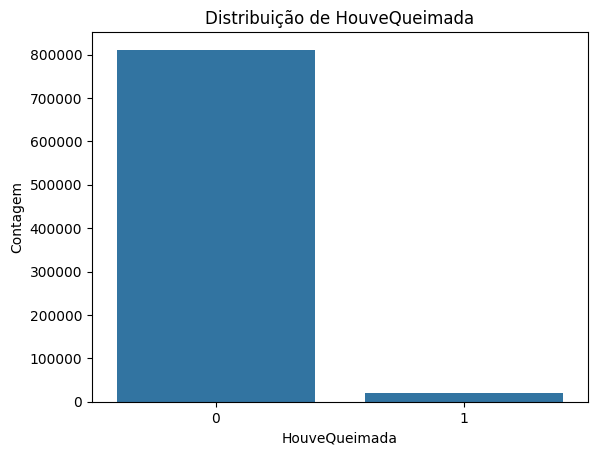

HouveQueimada
0    0.976583
1    0.023417
Name: proportion, dtype: float64


In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Contagem de quantos “sim” / “não”
sns.countplot(x="HouveQueimada", data=df_sem_nulos)
plt.title("Distribuição de HouveQueimada")
plt.xlabel("HouveQueimada")
plt.ylabel("Contagem")
plt.show()

# Ver percentual
print(df_sem_nulos["HouveQueimada"].value_counts(normalize=True))

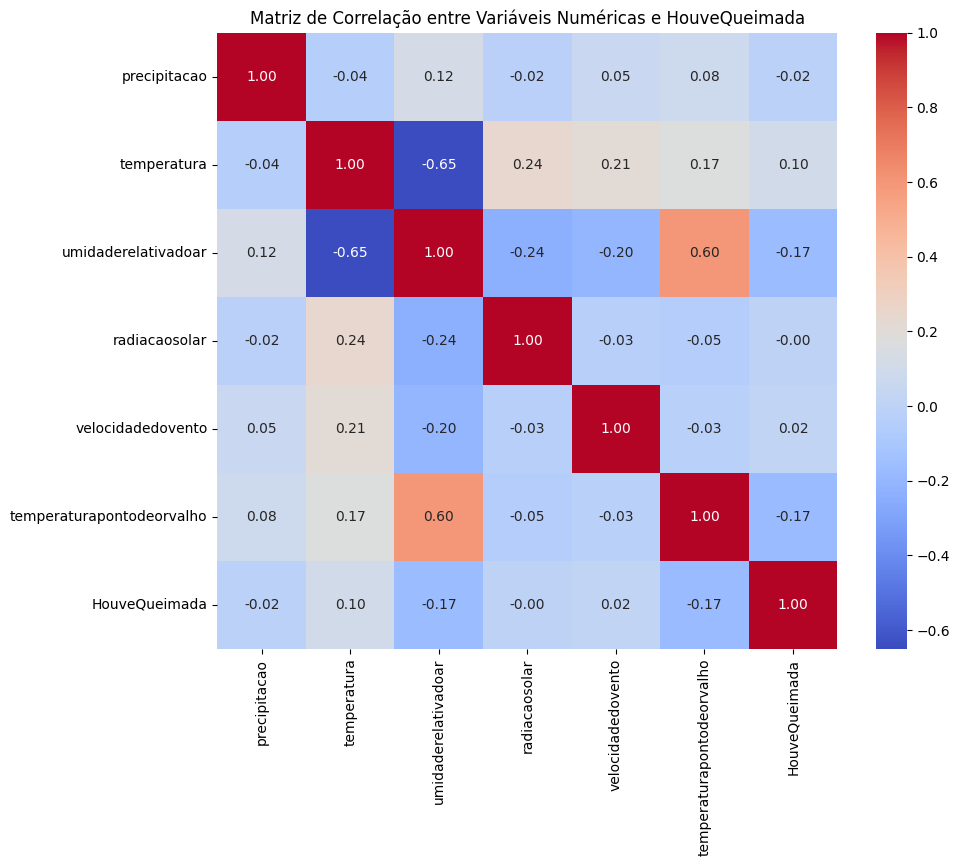

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

# Selecionar apenas as colunas numéricas relevantes de df_sem_nulos, excluindo 'HouveQueimada' e 'datahoramedicao' (que é datetime)
colunas_numericas_para_correlacao = df_sem_nulos.select_dtypes(include=np.number).columns.tolist()
colunas_numericas_para_correlacao.remove('HouveQueimada')

# Calcular a matriz de correlação
# Incluir 'HouveQueimada' para ver a correlação com a variável target
correlacao = df_sem_nulos[colunas_numericas_para_correlacao + ['HouveQueimada']].corr()

# Visualizar a matriz de correlação
plt.figure(figsize=(10,8))
sns.heatmap(correlacao, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Matriz de Correlação entre Variáveis Numéricas e HouveQueimada")
plt.show()

In [21]:
print(df_sem_nulos['HouveQueimada'].value_counts())

HouveQueimada
0    811239
1     19452
Name: count, dtype: int64


object
datetime64[ns]
0 linhas com NaT (não convertidas)


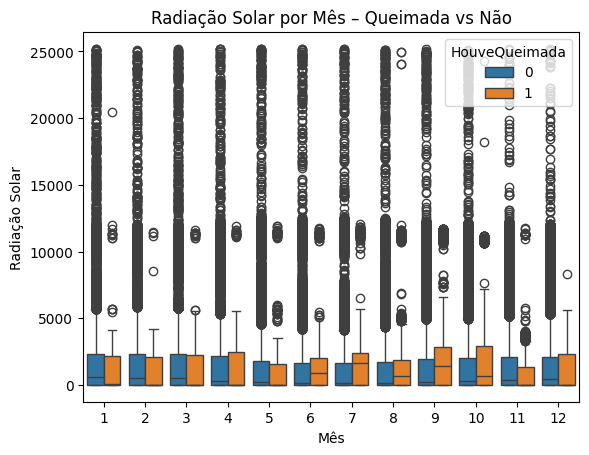

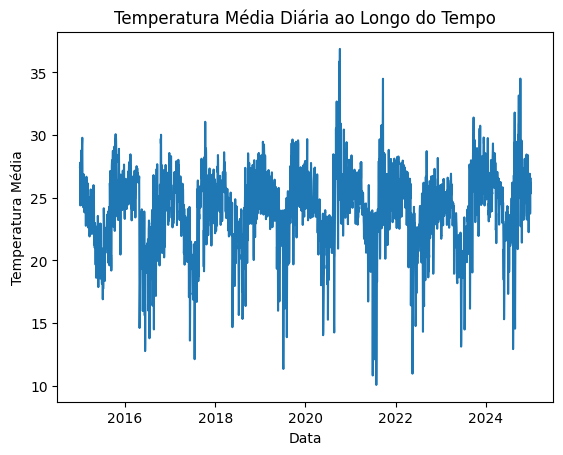

In [23]:
# Verificar o tipo
print(df_sem_nulos["datahoramedicao"].dtype)

# Tentar converter para datetime
df_sem_nulos["datahoramedicao"] = pd.to_datetime(
    df_sem_nulos["datahoramedicao"],
    errors="coerce"   # valores inválidos viram NaT
)
# Verificar de novo
print(df_sem_nulos["datahoramedicao"].dtype)

# Verificar se há linhas que falharam na conversão
print(df_sem_nulos["datahoramedicao"].isna().sum(), "linhas com NaT (não convertidas)")

# Extrair mês (ou dia, hora) se quiser
df_sem_nulos["mes"] = df_sem_nulos["datahoramedicao"].dt.month

# Boxplot da radiação solar por mês, separado por queimada vs não
sns.boxplot(x="mes", y="radiacaosolar", hue="HouveQueimada", data=df_sem_nulos)
plt.title("Radiação Solar por Mês – Queimada vs Não")
plt.xlabel("Mês")
plt.ylabel("Radiação Solar")
plt.show()

# Linha de série: média da temperatura ao longo do tempo — opcional
df_time = df_sem_nulos.set_index("datahoramedicao").resample("D")["temperatura"].mean().reset_index()
plt.plot(df_time["datahoramedicao"], df_time["temperatura"])
plt.title("Temperatura Média Diária ao Longo do Tempo")
plt.xlabel("Data")
plt.ylabel("Temperatura Média")
plt.show()

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


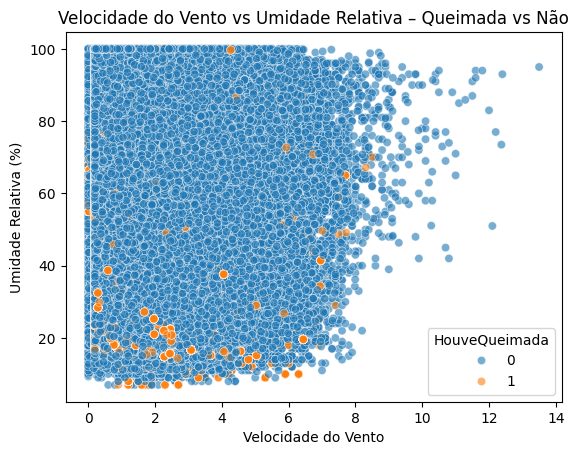

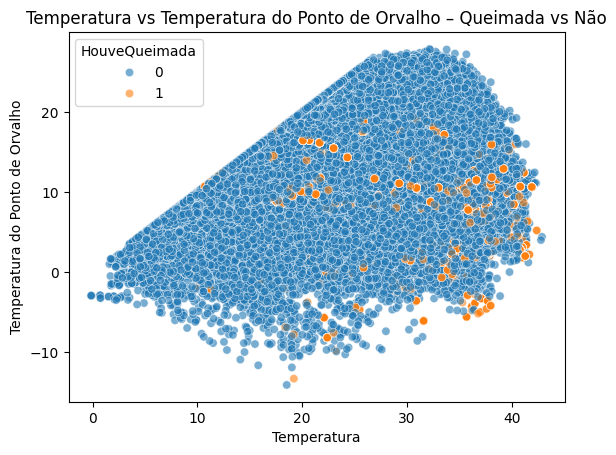

In [24]:
# Plotar velocidade do vento vs umidade relativa, com cor pela classe
sns.scatterplot(x="velocidadedovento", y="umidaderelativadoar", hue="HouveQueimada",
                data=df_sem_nulos, alpha=0.6)
plt.title("Velocidade do Vento vs Umidade Relativa – Queimada vs Não")
plt.xlabel("Velocidade do Vento")
plt.ylabel("Umidade Relativa (%)")
plt.show()

# Temperatura vs ponto de orvalho
sns.scatterplot(x="temperatura", y="temperaturapontodeorvalho", hue="HouveQueimada",
                data=df_sem_nulos, alpha=0.6)
plt.title("Temperatura vs Temperatura do Ponto de Orvalho – Queimada vs Não")
plt.xlabel("Temperatura")
plt.ylabel("Temperatura do Ponto de Orvalho")
plt.show()

/tmp/ipython-input-700733439.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df_sem_nulos[df_sem_nulos["HouveQueimada"]==0], x="temperatura", label="Não Queimada", shade=True)
/tmp/ipython-input-700733439.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df_sem_nulos[df_sem_nulos["HouveQueimada"]==1], x="temperatura", label="Queimada", shade=True)


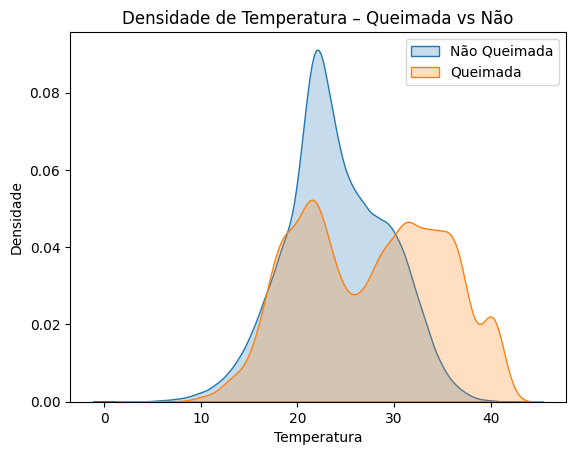

/tmp/ipython-input-700733439.py:12: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df_sem_nulos[df_sem_nulos["HouveQueimada"]==0], x="umidaderelativadoar", label="Não Queimada", shade=True)
/tmp/ipython-input-700733439.py:13: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df_sem_nulos[df_sem_nulos["HouveQueimada"]==1], x="umidaderelativadoar", label="Queimada", shade=True)


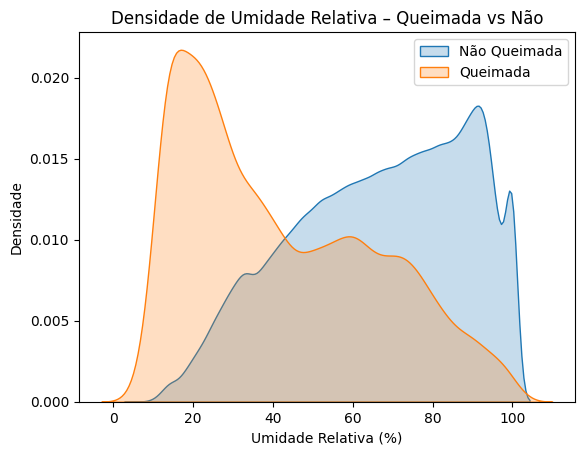

In [25]:
# Histograma/plot de densidade comparando queimada vs não
# Para temperatura
sns.kdeplot(data=df_sem_nulos[df_sem_nulos["HouveQueimada"]==0], x="temperatura", label="Não Queimada", shade=True)
sns.kdeplot(data=df_sem_nulos[df_sem_nulos["HouveQueimada"]==1], x="temperatura", label="Queimada", shade=True)
plt.title("Densidade de Temperatura – Queimada vs Não")
plt.xlabel("Temperatura")
plt.ylabel("Densidade")
plt.legend()
plt.show()

# Para umidaderelativadoar
sns.kdeplot(data=df_sem_nulos[df_sem_nulos["HouveQueimada"]==0], x="umidaderelativadoar", label="Não Queimada", shade=True)
sns.kdeplot(data=df_sem_nulos[df_sem_nulos["HouveQueimada"]==1], x="umidaderelativadoar", label="Queimada", shade=True)
plt.title("Densidade de Umidade Relativa – Queimada vs Não")
plt.xlabel("Umidade Relativa (%)")
plt.ylabel("Densidade")
plt.legend()
plt.show()


Gerando Box Plots para variáveis numéricas vs HouveQueimada...


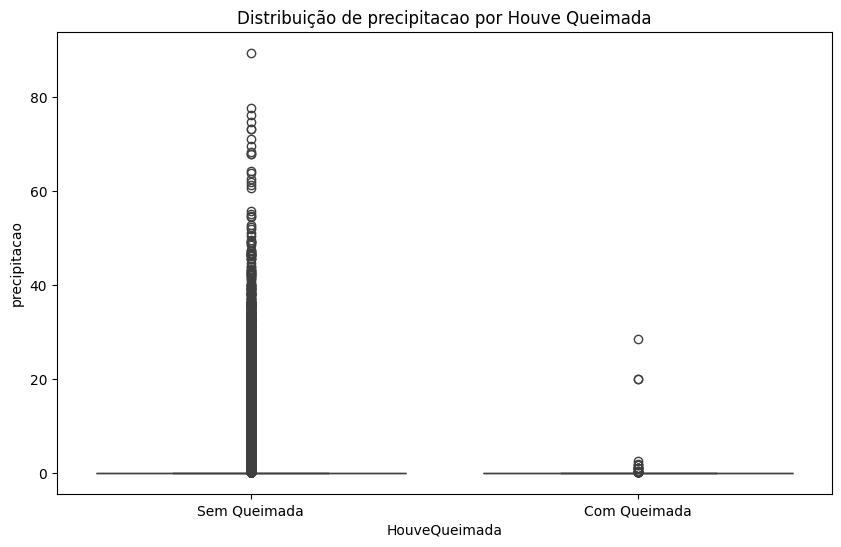

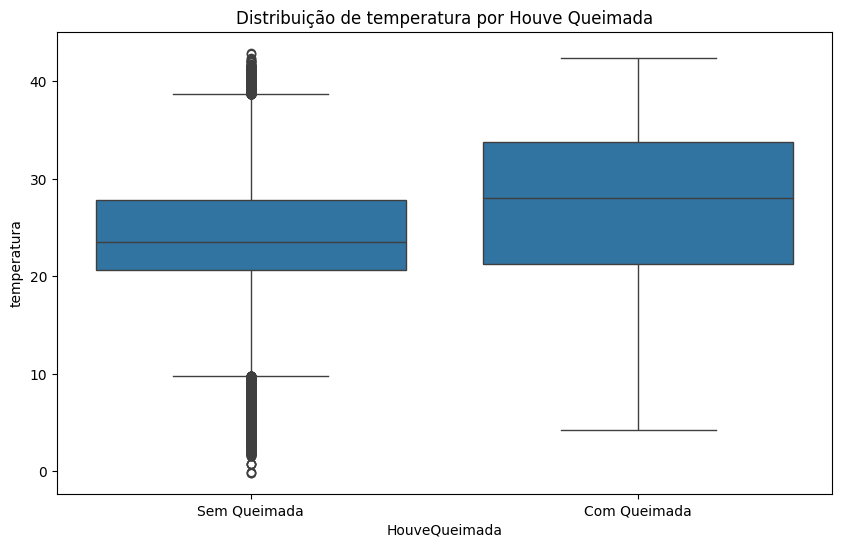

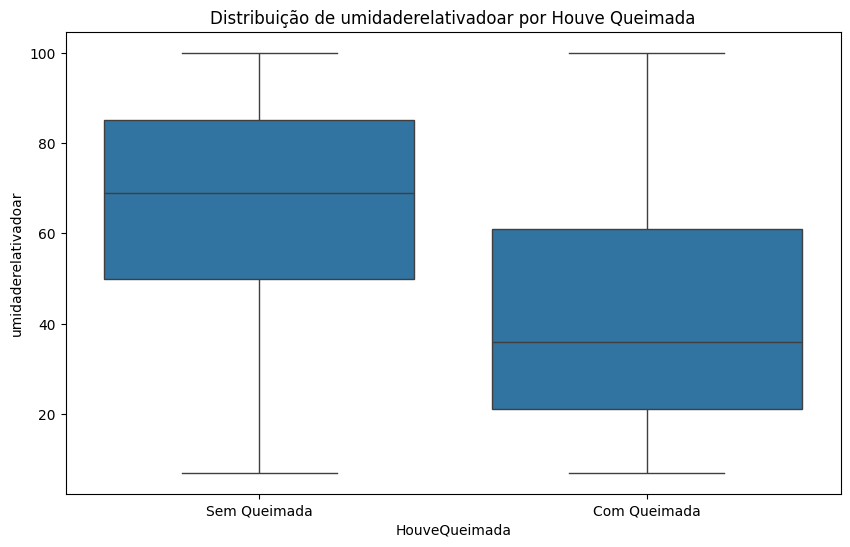

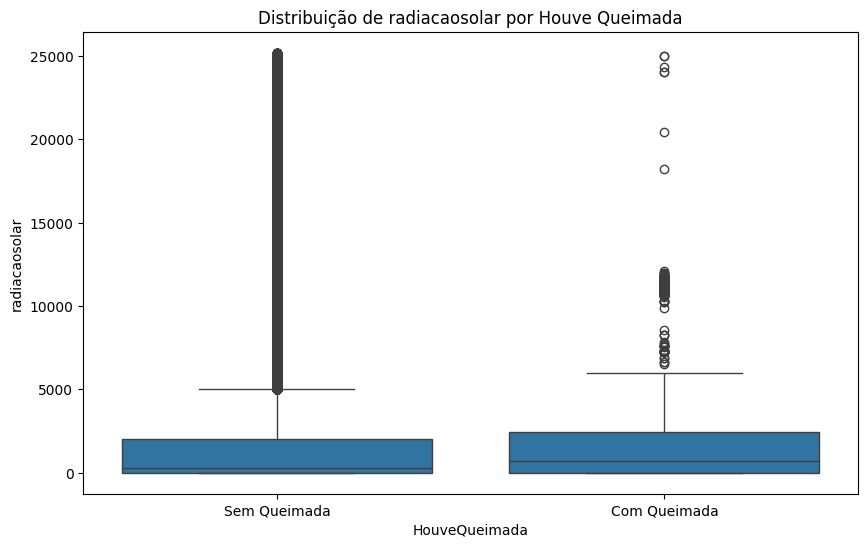

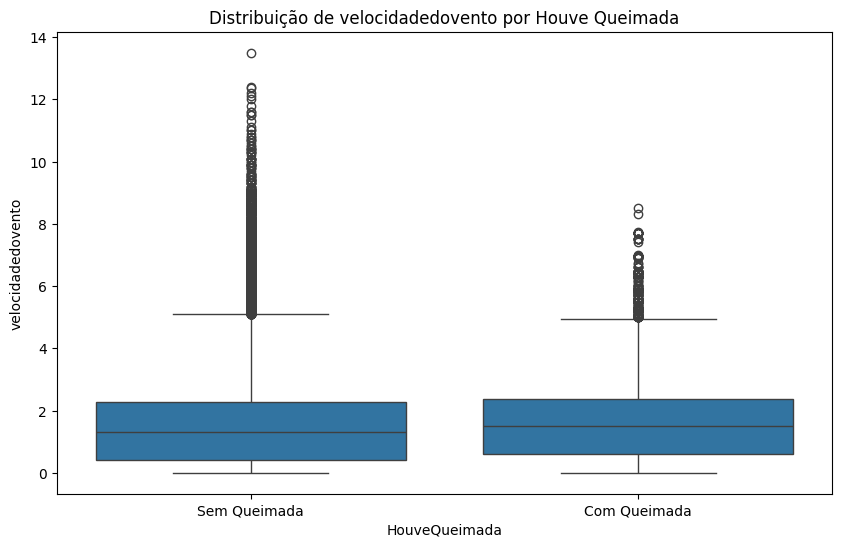

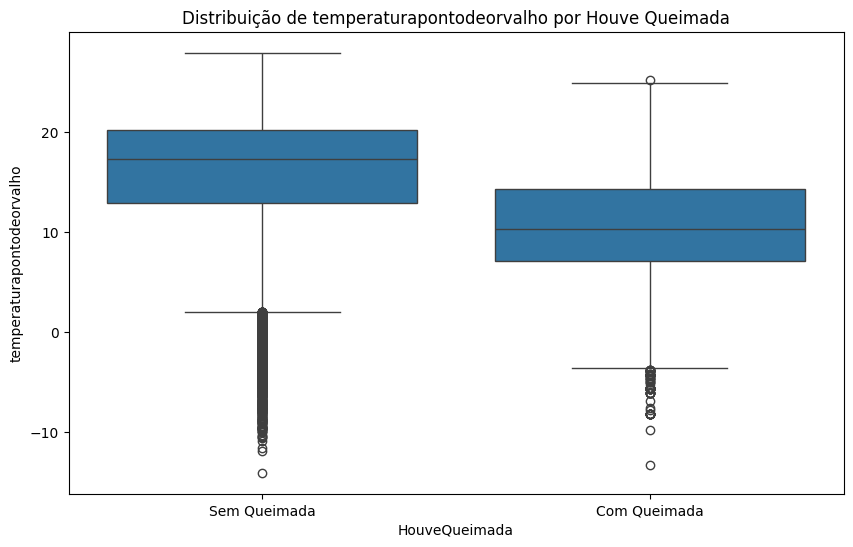

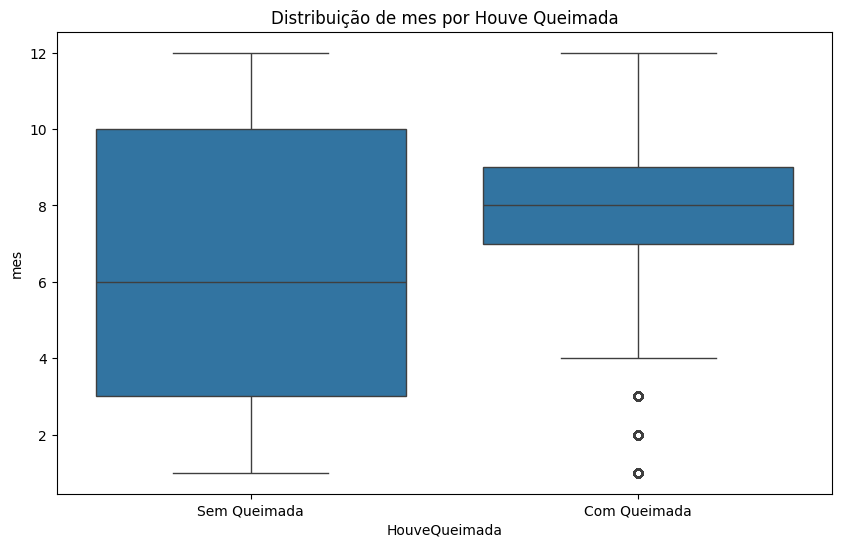


Box Plots gerados.


In [26]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np # Import numpy for np.number

# Selecionar apenas as colunas numéricas relevantes de df_sem_nulos, excluindo 'HouveQueimada' e 'datahoramedicao' (que é datetime)
colunas_numericas_para_boxplot = df_sem_nulos.select_dtypes(include=np.number).columns.tolist()
if 'HouveQueimada' in colunas_numericas_para_boxplot:
    colunas_numericas_para_boxplot.remove('HouveQueimada')
# Remover 'IndiceNesterov' se existir (foi removido, mas segurança)
if 'IndiceNesterov' in colunas_numericas_para_boxplot:
    colunas_numericas_para_boxplot.remove('IndiceNesterov')


print("Gerando Box Plots para variáveis numéricas vs HouveQueimada...")

# Gerar um box plot para cada coluna numérica
for coluna in colunas_numericas_para_boxplot:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='HouveQueimada', y=coluna, data=df_sem_nulos)
    plt.xticks([0, 1], ['Sem Queimada', 'Com Queimada'])
    plt.title(f"Distribuição de {coluna} por Houve Queimada")
    plt.ylabel(coluna)
    plt.show()

print("\nBox Plots gerados.")

In [29]:
# Estatísticas descritivas separadas por classe HouveQueimada = 0 e = 1
vars_to_describe = ["precipitacao", "pressaoatmosferica", "temperatura",
                    "umidaderelativadoar", "radiacaosolar", "velocidadedovento",
                    "temperaturapontodeorvalho"]

# Agrupar e descrever
descr = df_sem_nulos.groupby("HouveQueimada")[vars_to_describe].describe().transpose()
print(descr)

HouveQueimada                                0             1
precipitacao              count  811239.000000  19452.000000
                          mean        0.122572      0.004582
                          std         1.189393      0.289629
                          min         0.000000      0.000000
                          25%         0.000000      0.000000
                          50%         0.000000      0.000000
                          75%         0.000000      0.000000
                          max        89.400000     28.450000
temperatura               count  811239.000000  19452.000000
                          mean       23.999089     27.523508
                          std         5.315315      7.365541
                          min        -0.150000      4.258000
                          25%        20.600000     21.280000
                          50%        23.510000     28.035000
                          75%        27.840000     33.700000
                        

Gerando Mapa de Calor para Temperatura vs Umidade Relativa do Ar e Proporção de Queimadas...


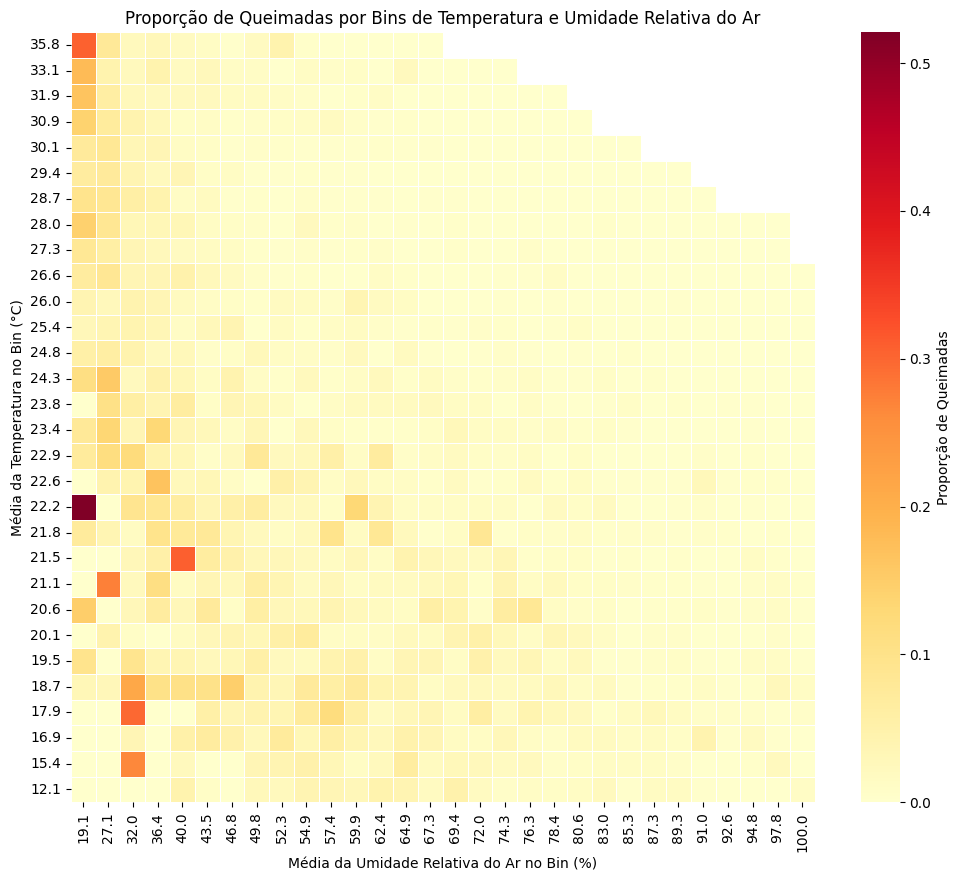


Mapa de Calor gerado.


In [30]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

print("Gerando Mapa de Calor para Temperatura vs Umidade Relativa do Ar e Proporção de Queimadas...")

# Definir o número de bins para Temperatura e Umidade
n_bins = 30

# Criar bins para Temperatura e Umidade Relativa do Ar
# Usar qcut para tentar criar bins com aproximadamente o mesmo número de pontos,
# o que ajuda a evitar bins vazios ou com poucos dados.
try:
    df_sem_nulos['Temp_Bin'] = pd.qcut(df_sem_nulos['temperatura'], q=n_bins, labels=False, duplicates='drop')
    df_sem_nulos['Umidade_Bin'] = pd.qcut(df_sem_nulos['umidaderelativadoar'], q=n_bins, labels=False, duplicates='drop')
except ValueError as e:
    print(f"Aviso: Não foi possível criar {n_bins} bins únicos para uma ou mais variáveis. Reduzindo o número de bins.")
    # Tentar com menos bins se houver erro
    n_bins = 20
    try:
        df_sem_nulos['Temp_Bin'] = pd.qcut(df_sem_nulos['temperatura'], q=n_bins, labels=False, duplicates='drop')
        df_sem_nulos['Umidade_Bin'] = pd.qcut(df_sem_nulos['umidaderelativadoar'], q=n_bins, labels=False, duplicates='drop')
    except ValueError as e_retry:
         print(f"Erro: Ainda não foi possível criar bins únicos com {n_bins} bins. Considere ajustar n_bins ou a estratégia de binning. Erro: {e_retry}")
         # Criar bins com cut se qcut falhar completamente, usando intervalos fixos
         if 'temperatura' in df_sem_nulos.columns:
              df_sem_nulos['Temp_Bin'] = pd.cut(df_sem_nulos['temperatura'], bins=n_bins, labels=False, include_lowest=True)
         if 'umidaderelativadoar' in df_sem_nulos.columns:
              df_sem_nulos['Umidade_Bin'] = pd.cut(df_sem_nulos['umidaderelativadoar'], bins=n_bins, labels=False, include_lowest=True)
         # Remover bins que podem ter NaN se pd.cut falhar
         df_sem_nulos.dropna(subset=['Temp_Bin', 'Umidade_Bin'], inplace=True)
         df_sem_nulos['Temp_Bin'] = df_sem_nulos['Temp_Bin'].astype(int)
         df_sem_nulos['Umidade_Bin'] = df_sem_nulos['Umidade_Bin'].astype(int)


# Calcular a proporção de queimadas por bin de Temperatura e Umidade
# Agrupar pelos bins e calcular a média de 'HouveQueimada' (que é 0 ou 1)
heatmap_data = df_sem_nulos.groupby(['Temp_Bin', 'Umidade_Bin'])['HouveQueimada'].mean().reset_index()

# Pivotar os dados para o formato de mapa de calor
heatmap_pivot = heatmap_data.pivot(index='Temp_Bin', columns='Umidade_Bin', values='HouveQueimada')

# Mapear os rótulos dos bins de volta para os valores médios ou limites
# Para qcut, podemos calcular o valor médio de temperatura e umidade em cada bin
temp_labels = df_sem_nulos.groupby('Temp_Bin')['temperatura'].mean()
umidade_labels = df_sem_nulos.groupby('Umidade_Bin')['umidaderelativadoar'].mean()

# Substituir os índices numéricos pelos valores médios dos bins para melhor legibilidade
heatmap_pivot.index = heatmap_pivot.index.map(temp_labels.round(1))
heatmap_pivot.columns = heatmap_pivot.columns.map(umidade_labels.round(1))


# Visualizar o mapa de calor
plt.figure(figsize=(12, 10))
sns.heatmap(heatmap_pivot, annot=False, cmap="YlOrRd", fmt=".2f", linewidths=.5, cbar_kws={'label': 'Proporção de Queimadas'})
plt.title("Proporção de Queimadas por Bins de Temperatura e Umidade Relativa do Ar")
plt.xlabel("Média da Umidade Relativa do Ar no Bin (%)")
plt.ylabel("Média da Temperatura no Bin (°C)")
plt.gca().invert_yaxis() # Inverter o eixo Y para mostrar temperaturas mais altas no topo
plt.show()

print("\nMapa de Calor gerado.")

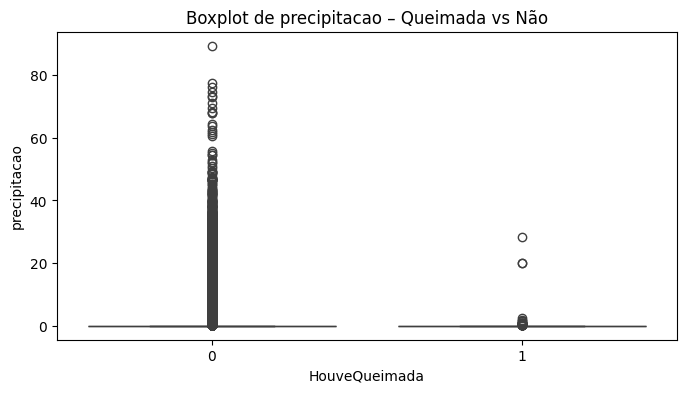

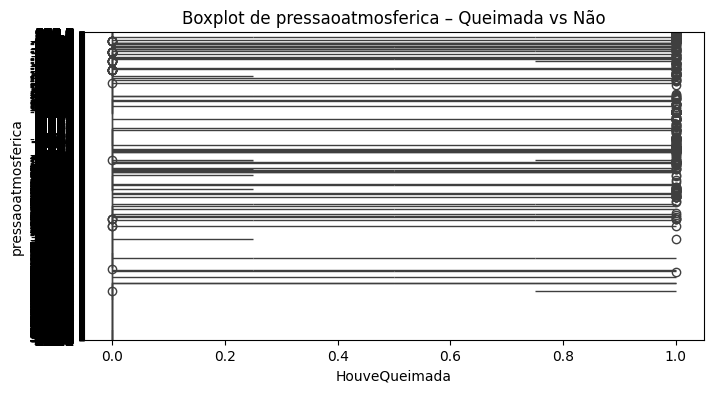

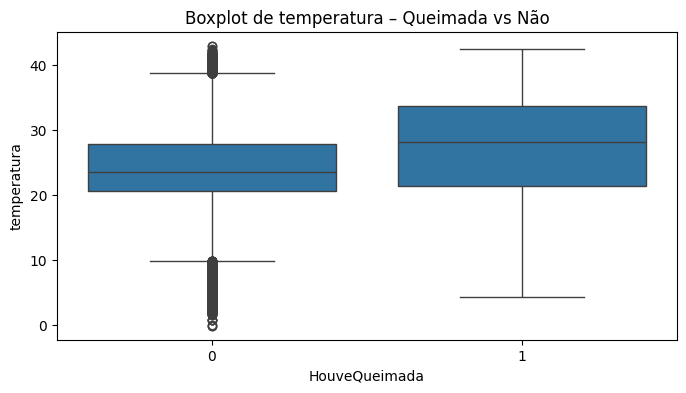

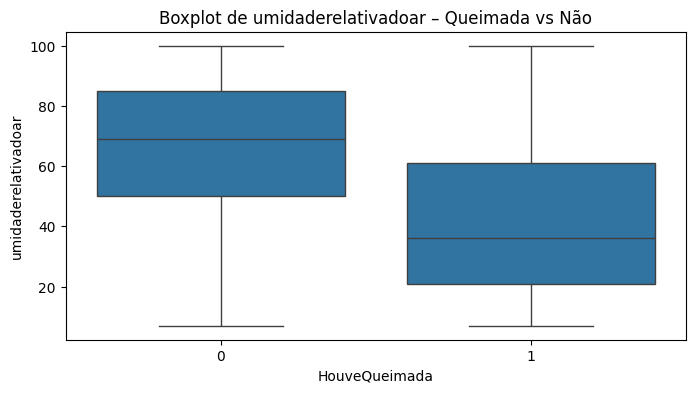

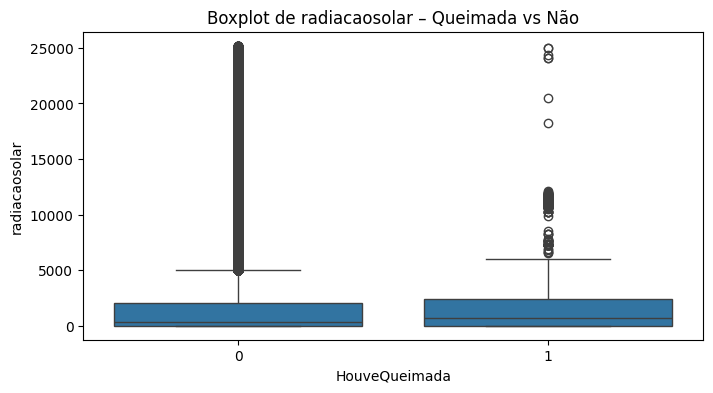

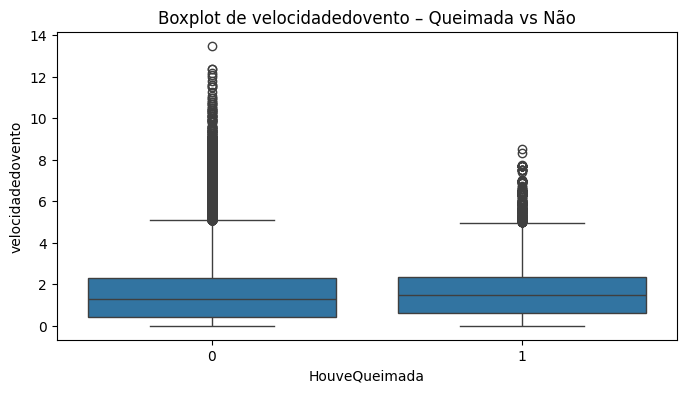

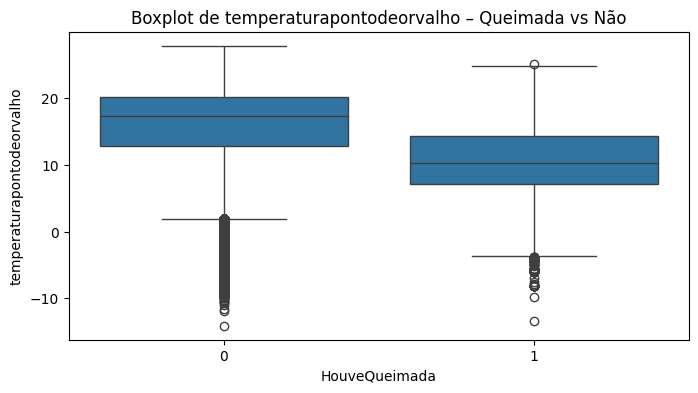

In [31]:
for var in vars_to_describe:
    plt.figure(figsize=(8,4))
    sns.boxplot(x="HouveQueimada", y=var, data=df_sem_nulos)
    plt.title(f"Boxplot de {var} – Queimada vs Não")
    plt.xlabel("HouveQueimada")
    plt.ylabel(var)
    plt.show()


In [32]:
# Supondo df_unificado já carregado e limpo
import pandas as pd
import numpy as np

# Variáveis de interesse
vars_to_analyse = [
    "precipitacao",
    "pressaoatmosferica",
    "temperatura",
    "umidaderelativadoar",
    "radiacaosolar",
    "velocidadedovento",
    "temperaturapontodeorvalho"
]

# Garantir que as colunas são numéricas (se não já for)
for var in vars_to_analyse:
    df_sem_nulos[var] = pd.to_numeric(df_sem_nulos[var], errors="coerce")

# Função para calcular modo (valor mais frequente)
def get_mode(series):
    # retorna o valor mais frequente; se múltiplos, pega o menor
    modes = series.mode(dropna=True)
    if modes.empty:
        return np.nan
    else:
        return modes.iloc[0]

# DataFrame para armazenar resultados
results = []

for var in vars_to_analyse:
    for value in [0, 1]:  # 0 = não queimada, 1 = queimada
        subset = df_sem_nulos[df_sem_nulos["HouveQueimada"] == value]
        mode_val = get_mode(subset[var].dropna())
        mean_val = subset[var].mean()
        min_val = subset[var].min()
        max_val = subset[var].max()
        results.append({
            "variavel": var,
            "HouveQueimada": value,
            "modo": mode_val,
            "media": mean_val,
            "minimo": min_val,
            "maximo": max_val
        })

df_summary = pd.DataFrame(results)
print(df_summary)

                     variavel  HouveQueimada   modo        media       minimo  \
0                precipitacao              0    0.0     0.122572     0.000000   
1                precipitacao              1    0.0     0.004582     0.000000   
2          pressaoatmosferica              0    0.0   233.483187 -7471.000000   
3          pressaoatmosferica              1    0.0   546.668963 -7371.000000   
4                 temperatura              0   22.0    23.999089    -0.150000   
5                 temperatura              1   33.8    27.523508     4.258000   
6         umidaderelativadoar              0  100.0    66.522708     7.000000   
7         umidaderelativadoar              1   14.0    41.899522     7.000000   
8               radiacaosolar              0   -3.5  1461.184939    -3.600000   
9               radiacaosolar              1   -3.5  1410.893606    -3.600000   
10          velocidadedovento              0    0.0     1.509109     0.000000   
11          velocidadedovent

# Análise dos Dados Coletados e Visualizações

Com base nas análises realizadas nos dados unificados (INMET + CIIAGRO + INPE) após a remoção de valores nulos, podemos destacar os seguintes pontos:

## Quantidade de Valores Únicos e Nulos

*   O DataFrame `df_sem_nulos` possui **830.691** registros e **10** colunas.
*   A coluna `cidade` possui **12** valores únicos, confirmando a inclusão das novas estações do CIIAGRO.
*   A coluna `datahoramedicao` possui **87.696** valores únicos, indicando dados em granularidade horária ao longo de vários anos.
*   As colunas `precipitacao`, `pressaoatmosferica`, `temperatura`, `umidaderelativadoar`, `radiacaosolar`, `velocidadedovento` e `temperaturapontodeorvalho` possuem uma quantidade variada de valores únicos, refletindo a natureza contínua ou discreta das medições.
*   Após a remoção das linhas com nulos, as colunas não apresentam mais valores nulos, exceto pela coluna `datahoramedicao` no `df_unificado` antes da remoção (40 nulos) que foram devidamente tratados.

## Distribuição da Variável Target 'HouveQueimada'

*   A variável `HouveQueimada` é a nossa variável alvo e é binária (0 para sem queimada, 1 para com queimada).
*   A contagem de valores mostra um forte **desequilíbrio de classes**:
    *   **0 (Sem Queimada):** 811.239 registros (aprox. 97.66%)
    *   **1 (Com Queimada):** 19.452 registros (aprox. 2.34%)
*   Este desequilíbrio precisará ser tratado durante a modelagem (como já foi feito com SMOTE no treino do Random Forest) para evitar que o modelo tenda a prever majoritariamente a classe majoritária (sem queimada).

## Matriz de Correlação

*   A matriz de correlação entre as variáveis numéricas e `HouveQueimada` (`df_sem_nulos`) revela algumas relações importantes:
    *   `umidaderelativadoar` e `temperaturapontodeorvalho` possuem uma correlação negativa com `HouveQueimada` (aprox. -0.17 e -0.17, respectivamente). Isso é esperado, pois baixa umidade e baixo ponto de orvalho (ar seco) estão associados a maior risco de incêndio.
    *   `temperatura` possui uma correlação positiva, embora fraca, com `HouveQueimada` (aprox. 0.10). Temperaturas mais altas tendem a aumentar o risco.
    *   `precipitacao` tem uma correlação negativa muito fraca (aprox. -0.015), o que faz sentido (chuva reduz o risco).
    *   `pressaoatmosferica` e `velocidadedovento` mostram correlações muito baixas com `HouveQueimada`.
    *   As variáveis meteorológicas também mostram correlações entre si (ex: Temperatura e Umidade Relativa são inversamente correlacionadas).

## Box Plots por Variável e 'HouveQueimada'

*   Os box plots confirmam a diferença na distribuição das variáveis entre os casos com e sem queimada:
    *   **Temperatura:** Caixas mais altas para "Com Queimada" (média e medianas maiores).
    *   **Umidade Relativa do Ar:** Caixas mais baixas para "Com Queimada" (média e medianas menores).
    *   **Temperatura do Ponto de Orvalho:** Caixas mais baixas para "Com Queimada" (média e medianas menores).
    *   **Precipitação:** A distribuição é muito concentrada em zero para ambas as classes, mas a média é significativamente menor para "Com Queimada", reforçando que queimadas ocorrem majoritariamente sem precipitação.
    *   Outras variáveis como pressão e velocidade do vento mostram sobreposição considerável entre as classes, indicando que sua relação direta pode ser menos pronunciada ou mais complexa.

## Gráficos de Densidade (KDE Plots)

*   Os gráficos de densidade para Temperatura e Umidade Relativa do Ar visualizam as diferenças de distribuição de forma contínua:
    *   **Temperatura:** O pico da densidade para "Com Queimada" está deslocado para temperaturas mais altas comparado a "Sem Queimada".
    *   **Umidade Relativa do Ar:** O pico da densidade para "Com Queimada" está claramente deslocado para umidades relativas mais baixas comparado a "Sem Queimada".

## Mapa de Calor: Temperatura vs Umidade e Proporção de Queimadas

*   Este mapa de calor mostra visualmente as condições de Temperatura e Umidade Relativa do Ar onde a proporção de queimadas é maior.
*   Áreas com **altas temperaturas** e **baixa umidade relativa do ar** apresentam as maiores proporções de eventos de queimada, confirmando a intuição e as análises anteriores. Isso valida essas duas variáveis como preditores importantes.

## Estatísticas Descritivas por Classe

*   As estatísticas descritivas (média, min, max, quartis) agrupadas por `HouveQueimada` quantificam as diferenças observadas nos box plots e gráficos de densidade.
*   Por exemplo, a média da `temperatura` para casos com queimada (27.52 °C) é maior do que para casos sem queimada (23.99 °C).
*   A média da `umidaderelativadoar` para casos com queimada (41.90%) é significativamente menor do que para casos sem queimada (66.52%).
*   Similarmente, a média da `temperaturapontodeorvalho` é menor para casos com queimada.
*   A precipitação média é quase zero nos casos de queimada.

Essas análises exploratórias e visualizações fornecem insights valiosos sobre as características meteorológicas associadas aos eventos de queimada, confirmando que temperatura e umidade relativa (e ponto de orvalho) são variáveis chave e que o desequilíbrio de classes é um fator importante a ser considerado na modelagem.


# Separar os dados em conjuntos de treino e teste.

### Explicação da Divisão Estratificada de Dados

A célula de código executada realiza a crucial etapa de preparar seus dados para o treinamento de modelos de aprendizado de máquina, dividindo-os em conjuntos de treino e teste de forma estratégica. O objetivo principal é garantir que ambos os conjuntos sejam representativos do conjunto de dados completo, especialmente considerando o desequilíbrio de classes na variável `HouveQueimada` e a necessidade de incluir todas as cidades e períodos temporais em ambas as partes.

Veja o detalhamento do processo:

1.  **Criação de Cópia (`df_para_divisao = df_sem_nulos.copy()`):**
    *   Primeiro, uma cópia do DataFrame limpo (`df_sem_nulos`) é criada. Isso é uma boa prática para evitar modificações indesejadas no DataFrame original durante o processo de divisão.

2.  **Definição da Estratificação (`df_para_divisao['Estrato_Cidade_Queimada'] = df_para_divisao['cidade'] + '_' + df_para_divisao['HouveQueimada'].astype(str)`):**
    *   Para garantir que a divisão preserve a proporção de eventos de queimada **dentro de cada cidade** e, implicitamente, ao longo do tempo (já que as cidades e o tempo estão correlacionados), uma nova coluna auxiliar é criada. Esta coluna, `Estrato_Cidade_Queimada`, concatena o nome da cidade com o valor da variável alvo (`HouveQueimada`). Por exemplo, teríamos estratos como `'ARIRANHA_0'`, `'ARIRANHA_1'`, `'BARRETOS_0'`, `'BARRETOS_1'`, etc.
    *   Esta coluna combinada serve como base para a estratificação.

3.  **Definição de Features e Target (`X`, `y`):**
    *   As variáveis de entrada para o modelo (features) são selecionadas e armazenadas no DataFrame `X`. A variável alvo a ser prevista (`HouveQueimada`) é armazenada na Série `y`. Colunas que não serão usadas diretamente no modelo (como a data/hora, a cidade original e a coluna de estratificação) são excluídas de `X`.

4.  **Tratamento de Estratos Singulares:**
    *   A função `train_test_split` do scikit-learn não consegue realizar a estratificação se houver "estratos" (valores únicos na coluna `stratify`) que contenham apenas uma única amostra. O código verifica a contagem de cada estrato e, se encontrar algum com apenas uma amostra, remove essas amostras do DataFrame para que a estratificação possa prosseguir sem erros.

5.  **Aplicação da Divisão Estratificada (`train_test_split(...)`):**
    *   A função `train_test_split` é chamada com os seguintes parâmetros importantes:
        *   `X`, `y`: Os dados a serem divididos.
        *   `test_size=0.2`: Define que 20% dos dados serão alocados para o conjunto de teste e os 80% restantes para o treino.
        *   `random_state=42`: Garante que a divisão seja reproduzível; ou seja, cada vez que você executar este código com o mesmo `random_state`, obterá a mesma divisão.
        *   `stratify=estrato`: **Este é o parâmetro chave.** Ele instrui a função a dividir os dados de forma que a proporção dos valores na coluna `estrato` (que combina Cidade e `HouveQueimada`) seja a mesma nos conjuntos de treino e teste que era no conjunto de dados original. Isso é crucial para:
            *   **Manter o desequilíbrio de classes:** A proporção de casos com e sem queimada será similar em treino e teste.
            *   **Garantir representatividade geográfica:** Todas as cidades (e suas respectivas proporções de queimadas) estarão presentes em ambos os conjuntos.
            *   **Garantir representatividade temporal:** Embora não explicitamente estratificado por data, a estratificação por cidade ao longo de um período extenso garante que diferentes anos e meses estarão presentes em ambos os conjuntos.

6.  **Verificação da Divisão:**
    *   Após a divisão, o código imprime o tamanho dos conjuntos resultantes e realiza verificações para confirmar que a estratificação funcionou conforme o esperado. Ele compara a proporção geral de queimadas, lista as cidades presentes em cada conjunto e verifica o range temporal. A análise da distribuição de queimadas por cidade em treino e teste valida que a proporção de eventos por localidade foi mantida.

Em suma, esta célula de código utiliza uma estratégia de divisão robusta para criar conjuntos de treino e teste que são estatisticamente semelhantes ao conjunto de dados original em termos de distribuição da variável alvo, garantindo que o modelo seja treinado e avaliado em dados representativos das condições reais.

In [33]:
# Estratégia para GARANTIR todos os requisitos
print("=== DIVISÃO ESTRATIFICADA POR CIDADE E OCORRÊNCIA DE QUEIMADA ===")

from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd

df_para_divisao = df_sem_nulos.copy()

# Criar uma coluna combinada para estratificação por Cidade e HouveQueimada
# Isso garante que a proporção de queimadas seja mantida DENTRO de cada cidade
if 'cidade' in df_para_divisao.columns and 'HouveQueimada' in df_para_divisao.columns:
    df_para_divisao['Estrato_Cidade_Queimada'] = df_para_divisao['cidade'] + '_' + df_para_divisao['HouveQueimada'].astype(str)
    print("Coluna de estratificação 'Estrato_Cidade_Queimada' criada.")
else:
     print("Colunas 'cidade' ou 'HouveQueimada' não encontradas. Não é possível estratificar.")
     # Se as colunas essenciais não existirem, parar ou lidar com o erro
     # Neste caso, vamos parar para evitar erros subsequentes
     raise ValueError("Colunas essenciais para estratificação (cidade, HouveQueimada) não encontradas.")


# Definir as features (X) e o target (y)
# Excluir colunas não relevantes para o modelo ou usadas para estratificação
colunas_features = [col for col in df_para_divisao.columns if col not in ['HouveQueimada', 'datahoramedicao', 'cidade', 'Estrato_Cidade_Queimada', 'Ano', 'Mes']]
target = 'HouveQueimada'

X = df_para_divisao[colunas_features]
y = df_para_divisao[target]
estrato = df_para_divisao['Estrato_Cidade_Queimada']


# Verificar se há estratos com apenas uma amostra (train_test_split não lida bem com isso)
estrato_counts = estrato.value_counts()
estratos_com_uma_amostra = estrato_counts[estrato_counts == 1].index.tolist()

if estratos_com_uma_amostra:
    print(f"\nAviso: Estratos com apenas uma amostra encontrados: {estratos_com_uma_amostra}")
    print("Removendo essas amostras para permitir a estratificação...")
    indices_para_remover = df_para_divisao[estrato.isin(estratos_com_uma_amostra)].index
    df_para_divisao = df_para_divisao.drop(indices_para_remover)

    # Atualizar X, y e estrato após a remoção
    X = df_para_divisao[colunas_features]
    y = df_para_divisao[target]
    estrato = df_para_divisao['Estrato_Cidade_Queimada']

    print(f"Total de amostras após remoção: {len(df_para_divisao):,}")
    print(f"Total de estratos após remoção: {len(estrato.unique())}")


# Aplicar a divisão estratificada
print("\nAplicando train_test_split com estratificação por Cidade e HouveQueimada...")
X_treino, X_teste, y_treino, y_teste = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=estrato # Estratificar pela coluna combinada
)

print("Divisao concluida.")

print(f"Tamanho do treino: {len(X_treino):,}")
print(f"Tamanho do teste: {len(X_teste):,}")

# Verificações pós-divisão
print("\n=== VERIFICAÇÃO PÓS-DIVISÃO ===")

# 1. Proporção de queimadas em cada conjunto
print("\nProporção de Queimadas (HouveQueimada=1):")
print(f"Dataset completo: {y.mean():.3%}")
print(f"Treino: {y_treino.mean():.3%}")
print(f"Teste: {y_teste.mean():.3%}")

# 2. Cidades em cada conjunto
print("\nCidades nos conjuntos:")
cidades_treino = df_para_divisao.loc[X_treino.index, 'cidade'].unique()
cidades_teste = df_para_divisao.loc[X_teste.index, 'cidade'].unique()
cidades_original = df_para_divisao['cidade'].unique()

print(f"Completo: {sorted(cidades_original)}")
print(f"Treino: {sorted(cidades_treino)}")
print(f"Teste: {sorted(cidades_teste)}")

# 3. Anos e Meses em cada conjunto (verificação implícita pela estratificação por cidade)
# Podemos verificar o range temporal ou a presença de todos os anos/meses
print("\nRange Temporal nos conjuntos:")
datahora_treino = df_para_divisao.loc[X_treino.index, 'datahoramedicao']
datahora_teste = df_para_divisao.loc[X_teste.index, 'datahoramedicao']

print(f"Treino: {datahora_treino.min()} até {datahora_treino.max()}")
print(f"Teste: {datahora_teste.min()} até {datahora_teste.max()}")

# Verificar presença de todos os anos e meses
print("\nAnos e Meses presentes:")
df_para_divisao['Ano'] = pd.to_datetime(df_para_divisao['datahoramedicao']).dt.year
df_para_divisao['Mes'] = pd.to_datetime(df_para_divisao['datahoramedicao']).dt.month

print(f"Anos (Treino): {sorted(df_para_divisao.loc[X_treino.index, 'Ano'].unique())}")
print(f"Anos (Teste): {sorted(df_para_divisao.loc[X_teste.index, 'Ano'].unique())}")
print(f"Meses (Treino): {sorted(df_para_divisao.loc[X_treino.index, 'Mes'].unique())}")
print(f"Meses (Teste): {sorted(df_para_divisao.loc[X_teste.index, 'Mes'].unique())}")


# 4. Distribuição de Queimadas por Cidade em cada conjunto
print("\nDistribuição de Queimadas por Cidade (Treino):")
dist_treino_cidade = df_para_divisao.loc[X_treino.index].groupby('cidade')['HouveQueimada'].agg(['count', 'sum', 'mean']).round(4)
print(dist_treino_cidade)

print("\nDistribuição de Queimadas por Cidade (Teste):")
dist_teste_cidade = df_para_divisao.loc[X_teste.index].groupby('cidade')['HouveQueimada'].agg(['count', 'sum', 'mean']).round(4)
print(dist_teste_cidade)

print("\n" + "="*50)
print("DIVISÃO DE DADOS CONCLUIDA")
print("="*50)

=== DIVISÃO ESTRATIFICADA POR CIDADE E OCORRÊNCIA DE QUEIMADA ===
Coluna de estratificação 'Estrato_Cidade_Queimada' criada.

Aplicando train_test_split com estratificação por Cidade e HouveQueimada...
Divisao concluida.
Tamanho do treino: 664,552
Tamanho do teste: 166,139

=== VERIFICAÇÃO PÓS-DIVISÃO ===

Proporção de Queimadas (HouveQueimada=1):
Dataset completo: 2.342%
Treino: 2.342%
Teste: 2.342%

Cidades nos conjuntos:
Completo: ['ARIRANHA', 'BARRETOS', 'BEBEDOURO', 'JALES', 'JOSE BONIFACIO', 'LINS', 'MIRASSOL', 'MONTE APRAZIVEL', 'NHANDEARA', 'NOVA GRANADA', 'PRESIDENTE PRUDENTE', 'VOTUPORANGA']
Treino: ['ARIRANHA', 'BARRETOS', 'BEBEDOURO', 'JALES', 'JOSE BONIFACIO', 'LINS', 'MIRASSOL', 'MONTE APRAZIVEL', 'NHANDEARA', 'NOVA GRANADA', 'PRESIDENTE PRUDENTE', 'VOTUPORANGA']
Teste: ['ARIRANHA', 'BARRETOS', 'BEBEDOURO', 'JALES', 'JOSE BONIFACIO', 'LINS', 'MIRASSOL', 'MONTE APRAZIVEL', 'NHANDEARA', 'NOVA GRANADA', 'PRESIDENTE PRUDENTE', 'VOTUPORANGA']

Range Temporal nos conjuntos:
Tre

# Testes de modelos de aprendizado de máquina para validar qual utilizar

## RANDOM FOREST CLASSIFIER

INICIANDO CLASSIFICADOR RANDOM FOREST
Variaveis selecionadas para o modelo:
  precipitacao
  pressaoatmosferica
  temperatura
  temperaturapontodeorvalho
  umidaderelativadoar
  velocidadedovento
  radiacaosolar

Utilizando dados de treino e teste ja separados (X_treino, X_teste, y_treino, y_teste)...
Dimensoes dos conjuntos selecionados:
X_treino_selecionado: (664552, 7)
y_treino: (664552,)
X_teste_selecionado: (166139, 7)
y_teste: (166139,)

Verificando e tratando valores ausentes nos dados de treino e teste selecionados...
NaNs em X_treino_selecionado antes da imputação: 121980
NaNs em X_teste_selecionado antes da imputação: 30525
Imputacao concluida.
NaNs em X_treino_imputado apos imputacao: 0
NaNs em X_teste_imputado apos imputacao: 0

Aplicando escalonamento dos dados imputados...
Escalonamento concluido

Aplicando balanceamento com SMOTE nos dados escalonados...
NaNs em X_treino_escalado antes do SMOTE: 0
Antes do balanceamento: {0: 648991, 1: 15561}
Apos o balanceamento: {0: 64

,HouveQueimada_Real,Probabilidade_Queimada,Previsao_RF
0,0,0.001034,0
1,0,0.075011,0
2,0,0.014011,0
3,0,0.024377,0
4,0,0.005285,0
5,0,0.055892,0
6,0,0.003922,0
7,0,0.000263,0
8,0,0.552743,1
9,0,0.499822,0



AVALIACAO DO RANDOM FOREST
Acuracia: 0.9743
Precisao: 0.4725
Recall: 0.8471
F1-Score: 0.6066
ROC-AUC: 0.9674

RELATORIO DE CLASSIFICACAO:
              precision    recall  f1-score   support

Sem Queimada       1.00      0.98      0.99    162248
Com Queimada       0.47      0.85      0.61      3891

    accuracy                           0.97    166139
   macro avg       0.73      0.91      0.80    166139
weighted avg       0.98      0.97      0.98    166139

MATRIZ DE CONFUSAO:
[[158568   3680]
 [   595   3296]]


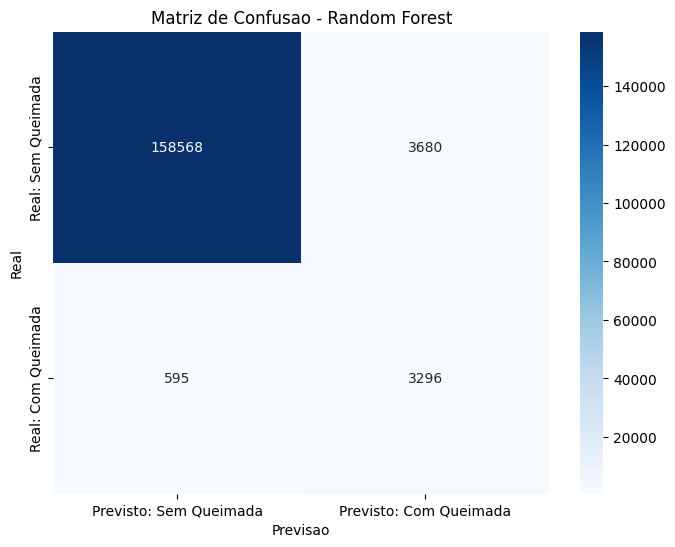


VARIAVEIS MAIS IMPORTANTES:
                    variavel  importancia
3  temperaturapontodeorvalho     0.232538
4        umidaderelativadoar     0.224549
6              radiacaosolar     0.150592
2                temperatura     0.150062
1         pressaoatmosferica     0.119983
5          velocidadedovento     0.112382
0               precipitacao     0.009895


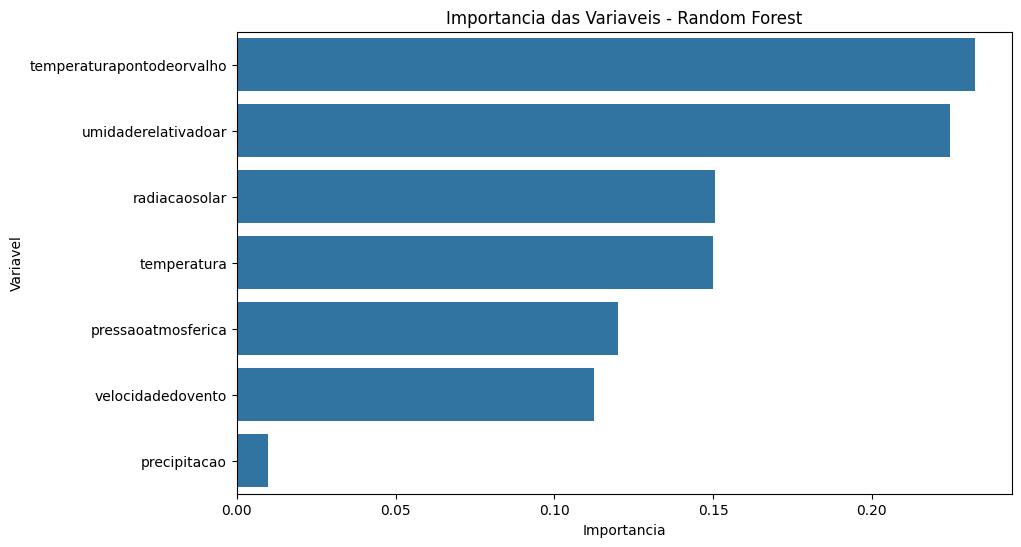


ANALISE DAS PREVISOES POR CIDADE:
                    HouveQueimada               Previsao_RF          \
                            count   sum    mean         sum    mean   
cidade                                                                
ARIRANHA                    11462    85  0.0074         444  0.0387   
BARRETOS                    14194  1227  0.0864        2429  0.1711   
BEBEDOURO                    7295   235  0.0322         339  0.0465   
JALES                       14025   125  0.0089         277  0.0198   
JOSE BONIFACIO              11516   168  0.0146         177  0.0154   
LINS                        14548   462  0.0318         669  0.0460   
MIRASSOL                    16859   222  0.0132         363  0.0215   
MONTE APRAZIVEL             16360   264  0.0161         328  0.0200   
NHANDEARA                   17428   227  0.0130         451  0.0259   
NOVA GRANADA                16905   596  0.0353         929  0.0550   
PRESIDENTE PRUDENTE         14878   129  0

In [36]:
# =============================================
# MODELO 1: CLASSIFICADOR RANDOM FOREST
# =============================================

print("INICIANDO CLASSIFICADOR RANDOM FOREST")
print("=" * 50)

# 1. IMPORTAR BIBLIOTECAS
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
import numpy as np
from sklearn.impute import SimpleImputer # Importar SimpleImputer

# 2. DEFINIR VARIAVEIS QUE VAMOS USAR NO MODELO
variaveis = [
    'precipitacao', 'pressaoatmosferica',
    'temperatura', 'temperaturapontodeorvalho', 'umidaderelativadoar',
    'velocidadedovento', # 'rajadamaximavento' foi removida na análise exploratória
    'radiacaosolar' # Adicionando radiacaosolar
]


print("Variaveis selecionadas para o modelo:")
# Verificar em X_treino (já é um DataFrame após a divisão)
for var in variaveis:
    if var in X_treino.columns:
        print("  " + var)
    else:
        print("  " + var + " - NAO ENCONTRADA")

# 3. SEPARAR DADOS DE TREINO E TESTE - Ja foram separados na celula anterior
print("\nUtilizando dados de treino e teste ja separados (X_treino, X_teste, y_treino, y_teste)...")

# Garantir que os dataframes de treino/teste contem apenas as variaveis selecionadas
# Selecionar apenas as colunas que existem em X_treino e X_teste
variaveis_existentes = [var for var in variaveis if var in X_treino.columns]
X_treino_selecionado = X_treino[variaveis_existentes].copy() # Usar .copy() para evitar SettingWithCopyWarning
X_teste_selecionado = X_teste[variaveis_existentes].copy() # Usar .copy()


print("Dimensoes dos conjuntos selecionados:")
print("X_treino_selecionado:", X_treino_selecionado.shape)
print("y_treino:", y_treino.shape)
print("X_teste_selecionado:", X_teste_selecionado.shape)
print("y_teste:", y_teste.shape)

# 4. TRATAR VALORES AUSENTES - IMPUTAÇÃO
print("\nVerificando e tratando valores ausentes nos dados de treino e teste selecionados...")

# Verificar NaNs nas colunas selecionadas antes da imputação
print(f"NaNs em X_treino_selecionado antes da imputação: {X_treino_selecionado.isnull().sum().sum()}")
print(f"NaNs em X_teste_selecionado antes da imputação: {X_teste_selecionado.isnull().sum().sum()}")


# Aplicar imputação por mediana
imputer = SimpleImputer(strategy='median')

# Fit o imputer APENAS nos dados de TREINO e transforme treino e teste
X_treino_imputado = imputer.fit_transform(X_treino_selecionado)
X_teste_imputado = imputer.transform(X_teste_selecionado) # Transformar teste usando o imputer treinado no treino

print("Imputacao concluida.")
print(f"NaNs em X_treino_imputado apos imputacao: {np.isnan(X_treino_imputado).sum()}")
print(f"NaNs em X_teste_imputado apos imputacao: {np.isnan(X_teste_imputado).sum()}")


# 5. PRE-PROCESSAMENTO - ESCALONAMENTO
print("\nAplicando escalonamento dos dados imputados...")

scaler = StandardScaler()
# Aplicar escalonamento nos dados JÁ IMPUTADOS
X_treino_escalado = scaler.fit_transform(X_treino_imputado)
X_teste_escalado = scaler.transform(X_teste_imputado)

print("Escalonamento concluido")

# 6. BALANCEAMENTO DOS DADOS DE TREINO
print("\nAplicando balanceamento com SMOTE nos dados escalonados...")

# Verificar NaNs antes do SMOTE (deve ser 0 após a imputação)
print(f"NaNs em X_treino_escalado antes do SMOTE: {np.isnan(X_treino_escalado).sum()}")

smote = SMOTE(random_state=42, sampling_strategy=0.1)
X_treino_balanceado, y_treino_balanceado = smote.fit_resample(X_treino_escalado, y_treino)

print("Antes do balanceamento:", y_treino.value_counts().to_dict())
print("Apos o balanceamento:", pd.Series(y_treino_balanceado).value_counts().to_dict())

# 7. CONFIGURAR E TREINAR O MODELO RANDOM FOREST
print("\nConfigurando modelo Random Forest...")

modelo_rf = RandomForestClassifier(
    n_estimators=100, # Numero de arvores
    max_depth=20,     # Profundidade maxima das arvores
    min_samples_split=5, # Minimo de amostras para dividir um no
    min_samples_leaf=2,  # Minimo de amostras em uma folha
    class_weight='balanced', # Ajusta automaticamente os pesos das classes inversamente proporcionais as frequencias
    random_state=42,
    n_jobs=-1 # Usa todos os nucleos da CPU
)

print("Treinando o modelo...")
modelo_rf.fit(X_treino_balanceado, y_treino_balanceado)
print("Treinamento concluido")

# 8. FAZER PREVISÕES NOS DADOS DE TESTE
print("\nFazendo previsoes nos dados de teste...")
previsoes_rf = modelo_rf.predict(X_teste_escalado) # Usar dados de teste escalonados
probabilidades_rf = modelo_rf.predict_proba(X_teste_escalado)[:, 1] # Probabilidade da classe positiva (Queimada)

print("Previsoes concluidas")

# Exibir as probabilidades de previsão
print("\nExibindo probabilidades de previsão (primeiras 10):")
# Criar um DataFrame temporário para exibir as probabilidades junto com a classe real
# Usar os dados originais de teste para manter as colunas de identificacao (se existirem)
# É melhor usar o X_teste_selecionado (DataFrame) para manter os nomes das colunas e índices originais
teste_data_com_prob = X_teste_selecionado.copy() # Copia as features de teste originais (com NaNs se houver)
teste_data_com_prob['HouveQueimada_Real'] = y_teste # Adiciona a coluna real
teste_data_com_prob['Probabilidade_Queimada'] = probabilidades_rf # Adiciona as probabilidades
teste_data_com_prob['Previsao_RF'] = previsoes_rf # Adiciona as previsões binárias

# Resetar o índice para que o índice original do df_sem_nulos não cause problemas na exibição
teste_data_com_prob = teste_data_com_prob.reset_index(drop=True)

display(teste_data_com_prob[['HouveQueimada_Real', 'Probabilidade_Queimada', 'Previsao_RF']].head(10))


# 9. AVALIACAO COMPLETA DO MODELO
print("\nAVALIACAO DO RANDOM FOREST")
print("=" * 40)

# Metricas principais
acuracia = accuracy_score(y_teste, previsoes_rf)
precisao = precision_score(y_teste, previsoes_rf)
recall = recall_score(y_teste, previsoes_rf)
f1 = f1_score(y_teste, previsoes_rf)
roc_auc = roc_auc_score(y_teste, probabilidades_rf)

print("Acuracia:", round(acuracia, 4))
print("Precisao:", round(precisao, 4))
print("Recall:", round(recall, 4))
print("F1-Score:", round(f1, 4))
print("ROC-AUC:", round(roc_auc, 4))

# Relatorio de classificacao detalhado
print("\nRELATORIO DE CLASSIFICACAO:")
print(classification_report(y_teste, previsoes_rf, target_names=['Sem Queimada', 'Com Queimada']))

# Matriz de confusao
print("MATRIZ DE CONFUSAO:")
matriz_confusao = confusion_matrix(y_teste, previsoes_rf)
print(matriz_confusao)

# Visualizacao da Matriz de Confusao
plt.figure(figsize=(8, 6))
sns.heatmap(matriz_confusao, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Previsto: Sem Queimada', 'Previsto: Com Queimada'],
            yticklabels=['Real: Sem Queimada', 'Real: Com Queimada'])
plt.xlabel('Previsao')
plt.ylabel('Real')
plt.title('Matriz de Confusao - Random Forest')
plt.show()


# 10. ANALISE DAS VARIAVEIS MAIS IMPORTANTES
print("\nVARIAVEIS MAIS IMPORTANTES:")
# Garantir que os nomes das features estejam alinhados com os scores de importância
importancia_variaveis = pd.DataFrame({
    'variavel': variaveis_existentes, # Usar a lista 'variaveis_existentes' para os nomes
    'importancia': modelo_rf.feature_importances_
}).sort_values('importancia', ascending=False)

print(importancia_variaveis.head(len(variaveis_existentes))) # Mostrar importancia de todas as variaveis

# Plotar importancia das variaveis
plt.figure(figsize=(10, 6))
sns.barplot(x='importancia', y='variavel', data=importancia_variaveis)
plt.title('Importancia das Variaveis - Random Forest')
plt.xlabel('Importancia')
plt.ylabel('Variavel')
plt.show()


# 11. ANALISE DAS PREVISÕES POR CIDADE
print("\nANALISE DAS PREVISOES POR CIDADE:")
# Precisamos acessar a coluna 'cidade' do DataFrame original ou de uma cópia
# que mantenha os índices originais do conjunto de teste.
# Assuming df_para_divisao was created before the split and has the original index
if 'cidade' in df_para_divisao.columns and 'HouveQueimada' in df_para_divisao.columns:
    # Usar o índice do X_teste para selecionar as linhas correspondentes em df_para_divisao
    dados_teste_originais = df_para_divisao.loc[X_teste_selecionado.index].copy()

    dados_teste_originais['Previsao_RF'] = previsoes_rf
    dados_teste_originais['Probabilidade_RF'] = probabilidades_rf

    estatisticas_por_cidade = dados_teste_originais.groupby('cidade').agg({
        'HouveQueimada': ['count', 'sum', 'mean'],
        'Previsao_RF': ['sum', 'mean'],
        'Probabilidade_RF': 'mean'
    }).round(4)

    print(estatisticas_por_cidade)
else:
    print("Colunas 'cidade' ou 'HouveQueimada' nao encontradas no dataframe original para analise por cidade.")


# 12. INTERPRETACAO DOS RESULTADOS
print("\nINTERPRETACAO DOS RESULTADOS:")
print("O modelo acertou", round(acuracia*100, 1), "% das classificacoes totais (Acuracia)")
print("Consegue detectar", round(recall*100, 1), "% das queimadas reais (Recall/Sensibilidade)")
print("Quando preve queimada, esta correto", round(precisao*100, 1), "% das vezes (Precisao)")
print("Balanceamento entre Precisao/Recall:", round(f1*100, 1), "% (F1-Score)")
print("Capacidade de discriminacao entre classes:", round(roc_auc*100, 1), "% (ROC-AUC)")

# 13. CRITERIOS DE SUCESSO DO MODELO (Exemplo - ajustar conforme necessidade do projeto)
print("\nCRITERIOS DE SUCESSO DO MODELO (Exemplo):")
print("ROC-AUC > 0.8:", "SIM" if roc_auc > 0.8 else "NAO", "(", round(roc_auc, 4), ")")
print("Recall > 0.7:", "SIM" if recall > 0.7 else "NAO", "(", round(recall, 4), ")")
print("Precisao > 0.5:", "SIM" if precisao > 0.5 else "NAO", "(", round(precisao, 4), ")")
print("F1-Score > 0.6:", "SIM" if f1 > 0.6 else "NAO", "(", round(f1, 4), ")")

print("\n" + "="*50)
print("RANDOM FOREST - ANALISE CONCLUIDA")
print("="*50)

## Conclusão da Avaliação do Modelo Random Forest

Após o treinamento e avaliação do modelo Random Forest nos dados preparados (incluindo tratamento de valores ausentes e balanceamento com SMOTE), obtivemos os seguintes resultados de desempenho no conjunto de teste:

- **Acurácia:** 0.9743 (acerto geral nas classificações)
- **Precisão:** 0.4725 (das previsões de queimada, 47.25% estavam corretas)
- **Recall (Sensibilidade):** 0.8471 (das queimadas reais, 84.71% foram detectadas)
- **F1-Score:** 0.6066 (média harmônica entre Precisão e Recall)
- **ROC-AUC:** 0.9674 (capacidade de discriminação do modelo)

A **Matriz de Confusão** mostrou:
- **Verdadeiros Positivos (TP):** 3,296 (queimadas reais corretamente previstas)
- **Falsos Negativos (FN):** 595 (queimadas reais não detectadas)
- **Verdadeiros Negativos (TN):** 158,568 (não-queimadas corretamente previstas)
- **Falsos Positivos (FP):** 3,680 (não-queimadas previstas incorretamente como queimada)

**Análise:**
O modelo Random Forest demonstrou uma boa capacidade geral de acertar as classificações (Acurácia alta), o que era esperado dado o grande número de casos sem queimada. Mais importante para um problema de detecção de eventos raros como queimadas, o modelo alcançou um **Recall de 84.71%**, indicando que ele foi capaz de identificar uma proporção significativa dos eventos de queimada reais no conjunto de teste. A **Precisão de 47.25%** sugere que, quando o modelo preve uma queimada, ele está correto em cerca de metade das vezes. O **ROC-AUC de 0.9674** confirma que o modelo tem uma boa capacidade de diferenciar entre as classes "Com Queimada" e "Sem Queimada".

As **variáveis mais importantes** para o modelo, conforme a análise de feature importance, incluíram Temperatura do Ponto de Orvalho, Umidade Relativa do Ar, Radiação Solar, Temperatura do Ar, Pressão Atmosférica e Velocidade do Vento, o que faz sentido no contexto do risco de incêndios.

**Conclusão:**
O modelo Random Forest apresentou um desempenho promissor para a previsão de risco de queimadas, conseguindo detectar a maioria dos eventos reais com uma taxa de falsos positivos que pode ser ajustada dependendo do limiar de decisão. Ele serve como uma base sólida para comparações futuras. Podemos agora considerar a exploração de outros modelos ou a otimização deste Random Forest para tentar melhorar ainda mais as métricas, especialmente o balanceamento entre Precisão e Recall (refletido no F1-Score).

## XGBoost Classifier

Vamos agora testar outro modelo popular e poderoso para classificação: o XGBoost. Ele é um algoritmo de gradient boosting que constrói árvores de decisão de forma sequencial, otimizando a cada passo para melhorar o desempenho.

INICIANDO CLASSIFICADOR XGBOOST
Variaveis selecionadas para o modelo (mesmas do Random Forest):
  precipitacao
  pressaoatmosferica
  temperatura
  temperaturapontodeorvalho
  umidaderelativadoar
  velocidadedovento
  radiacaosolar

Utilizando dados de treino e teste ja separados (X_treino, X_teste, y_treino, y_teste)...
Dimensoes dos conjuntos selecionados:
X_treino_selecionado: (664552, 7)
y_treino: (664552,)
X_teste_selecionado: (166139, 7)
y_teste: (166139,)

Verificando e tratando valores ausentes nos dados de treino e teste selecionados...
NaNs em X_treino_selecionado antes da imputação: 121980
NaNs em X_teste_selecionado antes da imputação: 30525
Ainda existem NaNs. Aplicando imputacao por mediana...
Imputacao concluida.
NaNs em X_treino_imputado apos imputacao: 0
NaNs em X_teste_imputado apos imputacao: 0

Aplicando escalonamento dos dados imputados...
Escalonamento concluido

Aplicando balanceamento com SMOTE nos dados escalonados...
NaNs em X_treino_escalado antes do SMOTE: 0

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [21:48:19] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Treinamento concluido

Fazendo previsoes nos dados de teste...
Previsoes concluidas

AVALIACAO DO XGBOOST
Acuracia: 0.9765
Precisao: 0.4972
Recall: 0.3482
F1-Score: 0.4096
ROC-AUC: 0.9147

RELATORIO DE CLASSIFICACAO:
              precision    recall  f1-score   support

Sem Queimada       0.98      0.99      0.99    162248
Com Queimada       0.50      0.35      0.41      3891

    accuracy                           0.98    166139
   macro avg       0.74      0.67      0.70    166139
weighted avg       0.97      0.98      0.97    166139

MATRIZ DE CONFUSAO:
[[160878   1370]
 [  2536   1355]]


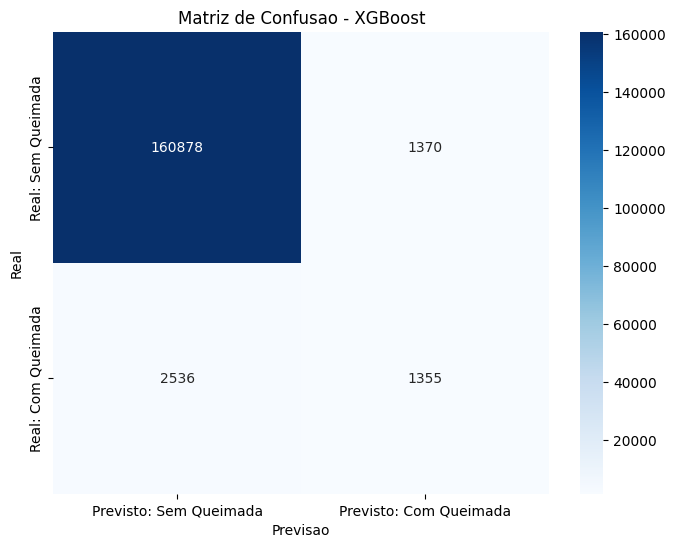


VARIAVEIS MAIS IMPORTANTES (XGBoost):
                    variavel  importancia
4        umidaderelativadoar     0.358741
3  temperaturapontodeorvalho     0.180987
6              radiacaosolar     0.137023
1         pressaoatmosferica     0.122160
5          velocidadedovento     0.080683
2                temperatura     0.071928
0               precipitacao     0.048478


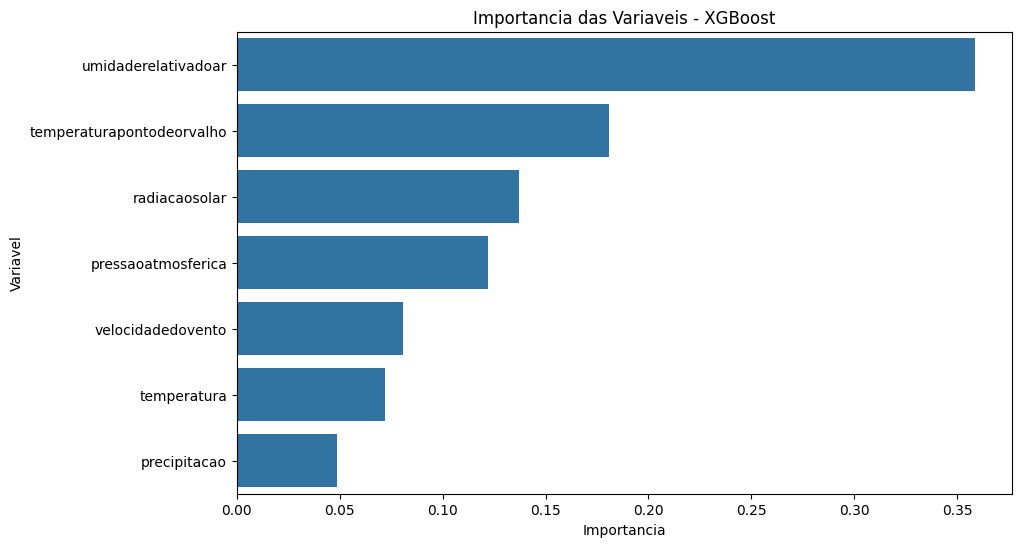


ANALISE DAS PREVISOES POR CIDADE (XGBoost):
                    HouveQueimada               Previsao_XGB          \
                            count   sum    mean          sum    mean   
cidade                                                                 
ARIRANHA                    11462    85  0.0074          173  0.0151   
BARRETOS                    14194  1227  0.0864         1136  0.0800   
BEBEDOURO                    7295   235  0.0322          132  0.0181   
JALES                       14025   125  0.0089          127  0.0091   
JOSE BONIFACIO              11516   168  0.0146           28  0.0024   
LINS                        14548   462  0.0318          253  0.0174   
MIRASSOL                    16859   222  0.0132           92  0.0055   
MONTE APRAZIVEL             16360   264  0.0161          166  0.0101   
NHANDEARA                   17428   227  0.0130          142  0.0081   
NOVA GRANADA                16905   596  0.0353          251  0.0148   
PRESIDENTE PRUDENTE

In [37]:
# =============================================
# MODELO 2: CLASSIFICADOR XGBOOST
# =============================================

print("INICIANDO CLASSIFICADOR XGBOOST")
print("=" * 50)

# 1. IMPORTAR BIBLIOTECAS
import xgboost as xgb
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.impute import SimpleImputer # Import SimpleImputer
import numpy as np

# 2. DEFINIR VARIAVEIS (Reutilizando as mesmas do Random Forest)
variaveis = [
    'precipitacao', 'pressaoatmosferica',
    'temperatura', 'temperaturapontodeorvalho', 'umidaderelativadoar',
    'velocidadedovento', 'radiacaosolar'
]


print("Variaveis selecionadas para o modelo (mesmas do Random Forest):")
# Verificar em X_treino (já é um DataFrame após a divisão)
# Need to ensure X_treino is a DataFrame for this check
if not isinstance(X_treino, pd.DataFrame):
    # If X_treino is not a DataFrame, something is wrong with the data split cell execution
    print("Erro: X_treino não é um DataFrame. Por favor, execute a célula de divisão de dados novamente.")
    # Exit or raise an error if data is not in expected format
    raise TypeError("X_treino não é um DataFrame. Execute a célula de divisão de dados.")


for var in variaveis:
    if var in X_treino.columns: # Check against the actual columns in the X_treino dataframe
        print("  " + var)
    else:
        print("  " + var + " - NAO ENCONTRADA")


# 3. SEPARAR DADOS DE TREINO E TESTE (Reutilizando os dataframes ja criados)
print("\nUtilizando dados de treino e teste ja separados (X_treino, X_teste, y_treino, y_teste)...")

# X_treino e X_teste ja devem estar com as colunas corretas apos a execucao da celula anterior
# Ensure the selected variables are used
variaveis_existentes = [var for var in variaveis if var in X_treino.columns]
X_treino_selecionado = X_treino[variaveis_existentes].copy()
X_teste_selecionado = X_teste[variaveis_existentes].copy()

print("Dimensoes dos conjuntos selecionados:")
print("X_treino_selecionado:", X_treino_selecionado.shape)
print("y_treino:", y_treino.shape)
print("X_teste_selecionado:", X_teste_selecionado.shape)
print("y_teste:", y_teste.shape)

# 4. PRE-PROCESSAMENTO - TRATAR VALORES AUSENTES (Reutilizando a logica de imputacao se necessario)
# Check for NaNs in the selected dataframes before converting to numpy arrays
print("\nVerificando e tratando valores ausentes nos dados de treino e teste selecionados...")

print(f"NaNs em X_treino_selecionado antes da imputação: {X_treino_selecionado.isnull().sum().sum()}")
print(f"NaNs em X_teste_selecionado antes da imputação: {X_teste_selecionado.isnull().sum().sum()}")


if X_treino_selecionado.isnull().sum().sum() > 0 or X_teste_selecionado.isnull().sum().sum() > 0:
    print("Ainda existem NaNs. Aplicando imputacao por mediana...")
    # Aplicar imputação por mediana
    imputer = SimpleImputer(strategy='median')
    # Fit o imputer APENAS nos dados de TREINO e transforme treino e teste
    X_treino_imputado = imputer.fit_transform(X_treino_selecionado)
    X_teste_imputado = imputer.transform(X_teste_selecionado) # Transformar teste usando o imputer treinado no treino
    print("Imputacao concluida.")
    print(f"NaNs em X_treino_imputado apos imputacao: {np.isnan(X_treino_imputado).sum()}")
    print(f"NaNs em X_teste_imputado apos imputacao: {np.isnan(X_teste_imputado).sum()}")
else:
    print("Nenhum valor ausente encontrado nos conjuntos de treino e teste selecionados.")
    X_treino_imputado = X_treino_selecionado.values # Convert to numpy array
    X_teste_imputado = X_teste_selecionado.values # Convert to numpy array


# 5. PRE-PROCESSAMENTO - ESCALONAMENTO (Reutilizando o scaler do Random Forest, se ainda existir, ou criando um novo)
print("\nAplicando escalonamento dos dados imputados...")

# Use the scaler on the (potentially imputed) numpy arrays
scaler_xgb = StandardScaler()
X_treino_escalado = scaler_xgb.fit_transform(X_treino_imputado)
X_teste_escalado = scaler_xgb.transform(X_teste_imputado)

print("Escalonamento concluido")

# 6. BALANCEAMENTO DOS DADOS DE TREINO (Reutilizando SMOTE)
print("\nAplicando balanceamento com SMOTE nos dados escalonados...")

# Check for NaNs before SMOTE just in case (should be 0 after imputation)
print(f"NaNs em X_treino_escalado antes do SMOTE: {np.isnan(X_treino_escalado).sum()}")

smote = SMOTE(random_state=42, sampling_strategy=0.1) # Using the same sampling_strategy as before
X_treino_balanceado, y_treino_balanceado = smote.fit_resample(X_treino_escalado, y_treino)

print("Antes do balanceamento:", y_treino.value_counts().to_dict())
print("Apos o balanceamento:", pd.Series(y_treino_balanceado).value_counts().to_dict())


# 7. CONFIGURAR E TREINAR O MODELO XGBOOST
print("\nConfigurando modelo XGBoost...")

# Adjust scale_pos_weight based on the balanced data ratio after SMOTE
# This is often recommended for imbalanced datasets with tree-based models
# However, since SMOTE was used, the data is now balanced, so default weight is usually fine.
# If not using SMOTE, you would calculate:
# scale_pos_weight = count(negative class) / count(positive class)
# For now, let's keep it simple as SMOTE was used.
# scale_pos_weight = pd.Series(y_treino_balanceado).value_counts()[0] / pd.Series(y_treino_balanceado).value_counts()[1]


modelo_xgb = xgb.XGBClassifier(
    objective='binary:logistic', # Para classificacao binaria
    n_estimators=100,
    learning_rate=0.1,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    use_label_encoder=False, # Para suprimir o warning
    eval_metric='logloss', # Metrica de avaliacao
    random_state=42,
    n_jobs=-1
    # scale_pos_weight=scale_pos_weight # Uncomment if not using SMOTE
)

print("Treinando o modelo XGBoost...")
modelo_xgb.fit(X_treino_balanceado, y_treino_balanceado)
print("Treinamento concluido")

# 8. FAZER PREVISÕES NOS DADOS DE TESTE
print("\nFazendo previsoes nos dados de teste...")
previsoes_xgb = modelo_xgb.predict(X_teste_escalado)
probabilidades_xgb = modelo_xgb.predict_proba(X_teste_escalado)[:, 1] # Probabilidade da classe positiva (Queimada)

print("Previsoes concluidas")

# 9. AVALIACAO COMPLETA DO MODELO
print("\nAVALIACAO DO XGBOOST")
print("=" * 40)

# Metricas principais
acuracia_xgb = accuracy_score(y_teste, previsoes_xgb)
precisao_xgb = precision_score(y_teste, previsoes_xgb)
recall_xgb = recall_score(y_teste, previsoes_xgb)
f1_xgb = f1_score(y_teste, previsoes_xgb)
roc_auc_xgb = roc_auc_score(y_teste, probabilidades_xgb)

print("Acuracia:", round(acuracia_xgb, 4))
print("Precisao:", round(precisao_xgb, 4))
print("Recall:", round(recall_xgb, 4))
print("F1-Score:", round(f1_xgb, 4))
print("ROC-AUC:", round(roc_auc_xgb, 4))

# Relatorio de classificacao detalhado
print("\nRELATORIO DE CLASSIFICACAO:")
print(classification_report(y_teste, previsoes_xgb, target_names=['Sem Queimada', 'Com Queimada']))

# Matriz de confusao
print("MATRIZ DE CONFUSAO:")
matriz_confusao_xgb = confusion_matrix(y_teste, previsoes_xgb)
print(matriz_confusao_xgb)

# Visualizacao da Matriz de Confusao
plt.figure(figsize=(8, 6))
sns.heatmap(matriz_confusao_xgb, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Previsto: Sem Queimada', 'Previsto: Com Queimada'],
            yticklabels=['Real: Sem Queimada', 'Real: Com Queimada'])
plt.xlabel('Previsao')
plt.ylabel('Real')
plt.title('Matriz de Confusao - XGBoost')
plt.show()

# 10. ANALISE DAS VARIAVEIS MAIS IMPORTANTES (XGBoost has different feature_importances_)
print("\nVARIAVEIS MAIS IMPORTANTES (XGBoost):")
# Get feature importances from the trained XGBoost model
# Ensure the feature names are correct after potential imputation and scaling
# Use the 'variaveis_existentes' list as feature names, as it reflects the columns actually used
importancia_variaveis_xgb = pd.DataFrame({
    'variavel': variaveis_existentes, # Use the 'variaveis_existentes' list for names
    'importancia': modelo_xgb.feature_importances_
}).sort_values('importancia', ascending=False)


print(importancia_variaveis_xgb.head(len(variaveis_existentes))) # Mostrar importancia de todas as variaveis

# Plotar importancia das variaveis
plt.figure(figsize=(10, 6))
sns.barplot(x='importancia', y='variavel', data=importancia_variaveis_xgb)
plt.title('Importancia das Variaveis - XGBoost')
plt.xlabel('Importancia')
plt.ylabel('Variavel')
plt.show()


# 11. ANALISE DAS PREVISÕES POR CIDADE
print("\nANALISE DAS PREVISOES POR CIDADE (XGBoost):")
# Ensure 'df_para_divisao' is available and has 'cidade' and 'HouveQueimada' columns
# Use the index of X_teste_selecionado to select the corresponding rows from df_para_divisao
if 'cidade' in df_para_divisao.columns and 'HouveQueimada' in df_para_divisao.columns:
    # Usar o índice do X_teste_selecionado para selecionar as linhas correspondentes em df_para_divisao
    dados_teste_originais_xgb = df_para_divisao.loc[X_teste_selecionado.index].copy()

    dados_teste_originais_xgb['Previsao_XGB'] = previsoes_xgb
    dados_teste_originais_xgb['Probabilidade_XGB'] = probabilidades_xgb

    estatisticas_por_cidade_xgb = dados_teste_originais_xgb.groupby('cidade').agg({
        'HouveQueimada': ['count', 'sum', 'mean'],
        'Previsao_XGB': ['sum', 'mean'],
        'Probabilidade_XGB': 'mean'
    }).round(4)

    print(estatisticas_por_cidade_xgb)
else:
    print("Colunas 'cidade' ou 'HouveQueimada' nao encontradas no dataframe original para analise por cidade.")


# 12. INTERPRETACAO DOS RESULTADOS
print("\nINTERPRETACAO DOS RESULTADOS (XGBoost):")
print("O modelo acertou", round(acuracia_xgb*100, 1), "% das classificacoes totais (Acuracia)")
print("Consegue detectar", round(recall_xgb*100, 1), "% das queimadas reais (Recall/Sensibilidade)")
print("Quando preve queimada, esta correto", round(precisao_xgb*100, 1), "% das vezes (Precisao)")
print("Balanceamento entre Precisao/Recall:", round(f1_xgb*100, 1), "% (F1-Score)")
print("Capacidade de discriminacao entre classes:", round(roc_auc_xgb*100, 1), "% (ROC-AUC)")

# 13. CRITERIOS DE SUCESSO DO MODELO (Exemplo - ajustar conforme necessidade do projeto)
print("\nCRITERIOS DE SUCESSO DO MODELO (XGBoost):")
print("ROC-AUC > 0.8:", "SIM" if roc_auc_xgb > 0.8 else "NAO", "(", round(roc_auc_xgb, 4), ")")
print("Recall > 0.7:", "SIM" if recall_xgb > 0.7 else "NAO", "(", round(recall_xgb, 4), ")")
print("Precisao > 0.5:", "SIM" if precisao_xgb > 0.5 else "NAO", "(", round(precisao_xgb, 4), ")")
print("F1-Score > 0.6:", "SIM" if f1_xgb > 0.6 else "NAO", "(", round(f1_xgb, 4), ")")

print("\n" + "="*50)
print("XGBOOST - ANALISE CONCLUIDA")
print("="*50)

## Conclusão da Avaliação do Modelo XGBoost

Após treinar e avaliar o modelo XGBoost, obtivemos os seguintes resultados de desempenho no conjunto de teste:

- **Acurácia:** 0.9765 (acerto geral nas classificações)
- **Precisão:** 0.4972 (das previsões de queimada, 49.72% estavam corretas)
- **Recall (Sensibilidade):** 0.3482 (das queimadas reais, 34.82% foram detectadas)
- **F1-Score:** 0.4096 (média harmônica entre Precisão e Recall)
- **ROC-AUC:** 0.9147 (capacidade de discriminação do modelo)

A **Matriz de Confusão** mostrou:
- **Verdadeiros Positivos (TP):** 1,355 (queimadas reais corretamente previstas)
- **Falsos Negativos (FN):** 2,536 (queimadas reais não detectadas)
- **Verdadeiros Negativos (TN):** 160,878 (não-queimadas corretamente previstas)
- **Falsos Positivos (FP):** 1,370 (não-queimadas previstas incorretamente como queimada)

**Análise e Comparação com Random Forest:**
O modelo XGBoost apresentou uma Acurácia geral ligeiramente maior (97.65%) em comparação com o Random Forest (97.43%). A Precisão do XGBoost (49.72%) foi similar à do Random Forest (47.25%). A diferença mais significativa está no **Recall**: o XGBoost (34.82%) detectou consideravelmente menos queimadas reais em comparação com o Random Forest (84.71%). Consequentemente, o F1-Score do XGBoost (0.4096) também foi menor do que o do Random Forest (0.6066), indicando um pior equilíbrio entre Precisão e Recall para este problema. O ROC-AUC do XGBoost (0.9147) foi menor que o do Random Forest (0.9674), mas ainda indica uma boa capacidade de discriminação.

As variáveis mais importantes para o XGBoost (Umidade Relativa do Ar, Temperatura do Ponto de Orvalho, Radiação Solar) são consistentes com as do Random Forest, reforçando a relevância dessas features.

**Conclusão:**
Nesta iteração, o modelo Random Forest supera o XGBoost em métricas cruciais para o problema de previsão de risco de queimadas, especialmente em Recall e F1-Score. O Random Forest foi muito mais eficaz em identificar a maioria dos eventos de queimada reais com uma melhor precisão. Embora o XGBoost tenha menos falsos positivos, sua alta taxa de falsos negativos o torna menos desejável para uma aplicação onde detectar o maior número possível de queimadas reais é prioritário. Com base nestes resultados, o Random Forest parece ser o modelo mais promissor até agora.

# Conclusão Geral e Seleção do Modelo Final

Com base no objetivo de desenvolver uma API para previsão de risco de queimadas e nas análises e modelagem realizadas, chegamos às seguintes conclusões:

## Processo Desenvolvido

1.  **Coleta e Unificação de Dados:** Iniciamos o projeto coletando dados meteorológicos de estações do INMET e CIIAGRO, além de dados de focos de queimada do INPE. Os dados foram unificados em um único DataFrame, combinando informações meteorológicas com a ocorrência de queimadas no mesmo ponto geográfico e temporal.
2.  **Tratamento de Dados:** Realizamos o tratamento inicial dos dados, incluindo a padronização de nomes de cidades, conversão de formatos de data/hora e cálculo de variáveis derivadas (como a temperatura do ponto de orvalho). Identificamos e removemos linhas com valores nulos para garantir a qualidade dos dados para a modelagem.
3.  **Análise Exploratória e Visualização:** Através de análises descritivas, matriz de correlação, box plots, gráficos de densidade e mapas de calor, exploramos a relação entre as variáveis meteorológicas e a ocorrência de queimadas. Confirmamos a forte influência de baixas umidades e altas temperaturas no risco de incêndio e visualizamos o desequilíbrio acentuado entre as classes "Com Queimada" e "Sem Queimada".
4.  **Divisão Estratificada de Dados:** Para preparar os dados para o treinamento do modelo de forma robusta, realizamos uma divisão estratificada. Essa estratégia garantiu que os conjuntos de treino e teste mantivessem a proporção de eventos de queimada dentro de cada cidade e abrangessem todas as épocas do ano e localidades presentes no dataset, fundamental para evitar vieses no treinamento e avaliação.
5.  **Modelagem Preditiva:** Testamos dois modelos de classificação: Random Forest e XGBoost. Ambos os modelos foram treinados utilizando as mesmas features meteorológicas relevantes, com pré-processamento (escalonamento) e balanceamento da classe minoritária (SMOTE) nos dados de treino para lidar com o desequilíbrio.

## Comparação e Seleção de Modelos

Avaliamos o desempenho de ambos os modelos no conjunto de teste com base em métricas importantes para problemas de classificação desbalanceada, como Acurácia, Precisão, Recall (Sensibilidade), F1-Score e ROC-AUC.

| Métrica      | Random Forest | XGBoost |
| :----------- | :------------ | :------ |
| **Acurácia** | 0.9743        | 0.9765  |
| **Precisão** | 0.4725        | 0.4972  |
| **Recall**   | **0.8471**    | 0.3482  |
| **F1-Score** | **0.6066**    | 0.4096  |
| **ROC-AUC**  | **0.9674**    | 0.9147  |

**Análise da Matriz de Confusão (no conjunto de teste):**

|                 | Random Forest | XGBoost |
| :-------------- | :------------ | :------ |
| **Verdadeiros Positivos (TP)** | 3,296         | 1,355   |
| **Falsos Negativos (FN)**    | 595           | 2,536   |
| **Verdadeiros Negativos (TN)** | 158,568       | 160,878 |
| **Falsos Positivos (FP)**      | 3,680         | 1,370   |

**Interpretação para a Seleção do Modelo:**

Para um problema de previsão de risco de queimadas, onde o custo de não detectar uma queimada real (Falso Negativo) é geralmente mais alto do que o custo de um alarme falso (Falso Positivo), a métrica **Recall** (Sensibilidade) é de suma importância. Um alto Recall significa que o modelo é eficaz em identificar a maioria dos eventos de queimada que realmente ocorrem.

*   O **Random Forest** demonstrou um **Recall significativamente maior (84.71%)** em comparação com o XGBoost (34.82%). Isso indica que o Random Forest foi muito mais eficaz em identificar as queimadas reais no conjunto de teste.
*   Embora o XGBoost tenha apresentado uma precisão ligeiramente maior e menos Falsos Positivos, seu baixo Recall significa que ele deixaria de detectar uma grande proporção de queimadas reais, o que não é desejável para este projeto.
*   O F1-Score, que é uma média harmônica entre Precisão e Recall, também favorece o Random Forest (0.6066 vs 0.4096), indicando um melhor equilíbrio geral.
*   O ROC-AUC, que mede a capacidade de discriminação do modelo, também foi superior para o Random Forest (0.9674 vs 0.9147).

## Decisão: Modelo Final

Com base na análise comparativa e na importância do Recall para o contexto de previsão de risco de queimadas, o modelo **Random Forest** é a escolha mais adequada para este projeto. Ele demonstrou uma capacidade superior de detectar eventos de queimada reais, o que é crucial para uma API de alerta precoce.

As variáveis mais importantes identificadas em ambos os modelos (Umidade Relativa do Ar, Temperatura do Ponto de Orvalho, Radiação Solar, Temperatura do Ar) reforçam que os dados meteorológicos selecionados são bons preditores para o risco de incêndio.

In [38]:
import pickle
import os

# Definir o caminho para salvar os arquivos do modelo e do scaler
caminho_salvar = '/content/drive/MyDrive/Estudos/Univesp - dados/PI QUEIMADAS/modelos/'
nome_arquivo_modelo = 'modelo_random_forest.pkl'
nome_arquivo_scaler = 'scaler_random_forest.pkl'

# Garantir que o diretório de destino existe
os.makedirs(caminho_salvar, exist_ok=True)

# Caminhos completos dos arquivos
caminho_modelo = os.path.join(caminho_salvar, nome_arquivo_modelo)
caminho_scaler = os.path.join(caminho_salvar, nome_arquivo_scaler)

print(f"Salvando modelo em: {caminho_modelo}")
print(f"Salvando scaler em: {caminho_scaler}")

# Salvar o modelo Random Forest treinado
try:
    with open(caminho_modelo, 'wb') as f:
        pickle.dump(modelo_rf, f)
    print("Modelo Random Forest salvo com sucesso!")
except Exception as e:
    print(f"Erro ao salvar o modelo Random Forest: {e}")

# Salvar o scaler usado para pré-processamento
# Certifique-se de que o objeto scaler (StandardScaler) foi criado e treinado (fit)
# na célula de treinamento do modelo Random Forest.
# No seu notebook, o scaler foi criado e treinado na célula D9JWWXUH3bsx.
try:
    with open(caminho_scaler, 'wb') as f:
        pickle.dump(scaler, f)
    print("Scaler salvo com sucesso!")
except NameError:
    print("Erro: O objeto 'scaler' não foi encontrado. Execute a célula de treinamento do modelo Random Forest (D9JWWXUH3bsx) para criar o scaler.")
except Exception as e:
    print(f"Erro ao salvar o scaler: {e}")

print("\nProcesso de serialização concluído.")

Salvando modelo em: /content/drive/MyDrive/Estudos/Univesp - dados/PI QUEIMADAS/modelos/modelo_random_forest.pkl
Salvando scaler em: /content/drive/MyDrive/Estudos/Univesp - dados/PI QUEIMADAS/modelos/scaler_random_forest.pkl
Modelo Random Forest salvo com sucesso!
Scaler salvo com sucesso!

Processo de serialização concluído.
